In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import os

In [2]:
# matplotlib 한글 폰트 셋업
import matplotlib as mpl
import matplotlib.pyplot as plt

 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(fontpath)  # 에전의 rebuild 대신 이걸 추가해야 설치한 폰트 추가됨
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

plt.rc('axes', unicode_minus=False)  # Glyph 8722 방지용 (마이너스 부호 문제 해결)

print("설정된 폰트 사이즈: {}".format(plt.rcParams['font.size']))  # 디폴트 폰트 크기
print("설정된 폰트: {}".format(plt.rcParams['font.family']))  # 디폴트 폰트

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
설정된 폰트 사이즈: 10.0
설정된 폰트

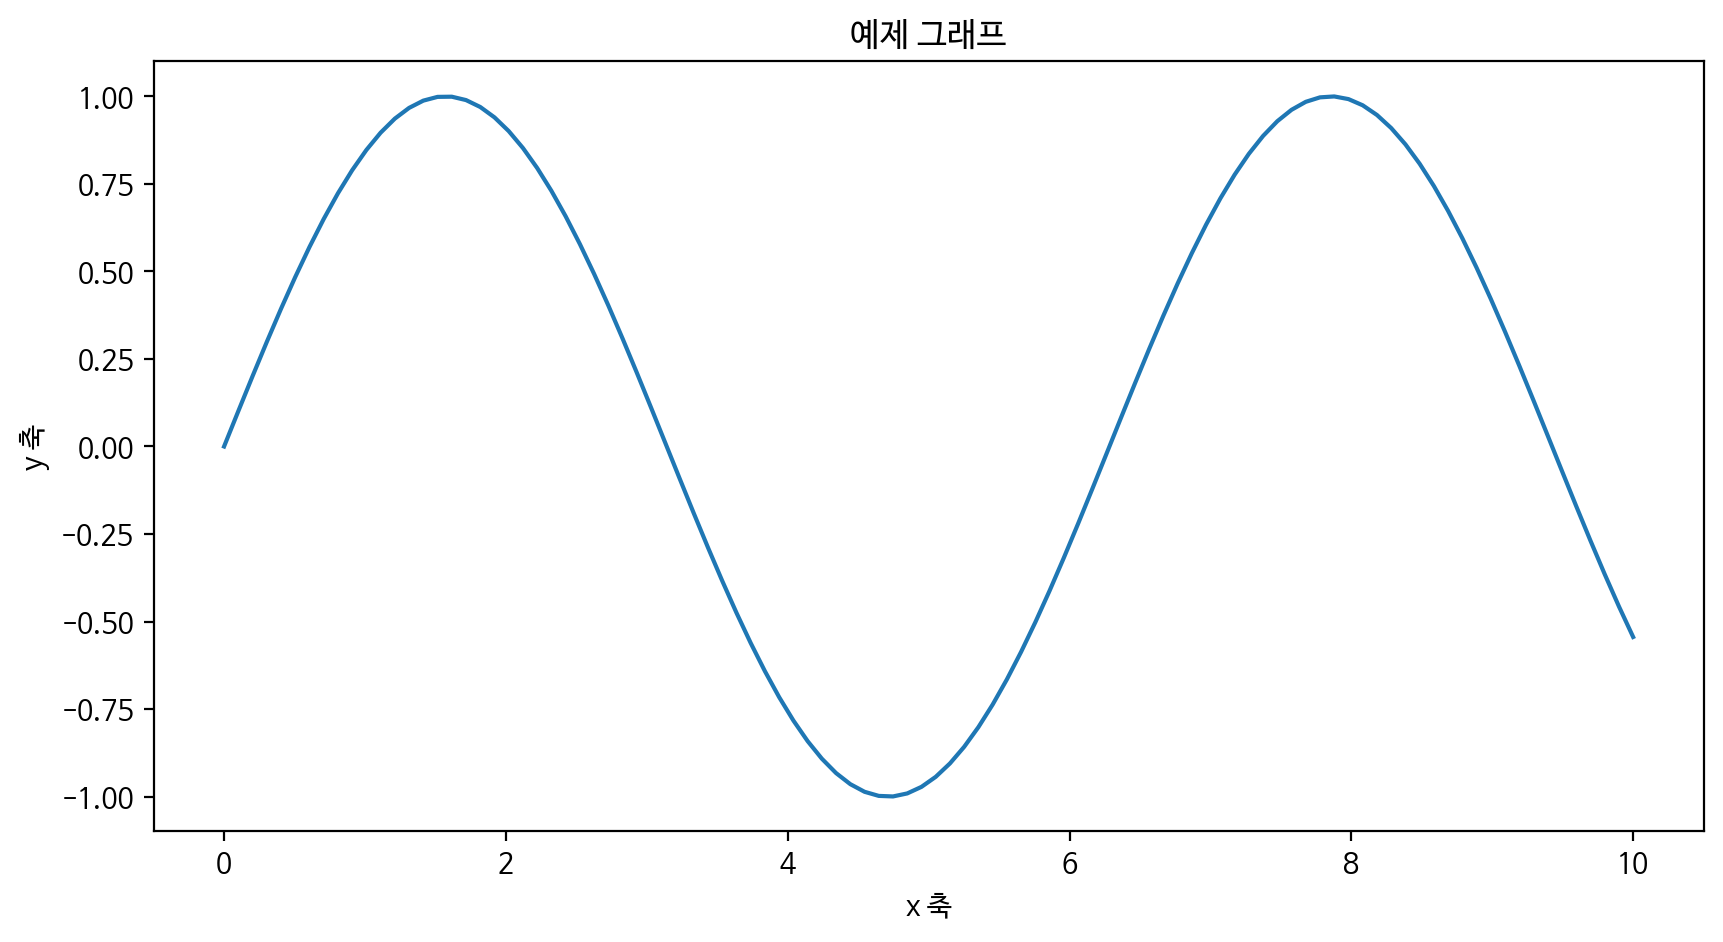

In [3]:
# 적용 확인하기 위한 예제 그래프 생성
import numpy as np
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 5))
sns.lineplot(x=x, y=np.sin(x))
plt.xlabel('x 축')
plt.ylabel('y 축')
plt.title('예제 그래프')
plt.show()

To Draw

- 모든 데이터의 라인그래프 (dissim은 rate와 함께 그릴 예정)
- feature importances
- neural network

일단은 fimp 까지 그림 그리고, 한번 보내드리기

### 데이터 로드

In [4]:
df = pd.read_csv("./DATA/merged_data.csv", index_col=0)
df

,cosine_similarity,dissimilarity,base_rate,base_rate_diff,FFR,ko-us_gap,governor,president,tr1,tr2
1999-01-07,NaN,NaN,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-02-04,0.727940,0.272060,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-03-04,0.733303,0.266697,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-04-08,0.811213,0.188787,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-05-06,0.759641,0.240359,4.75,NaN,4.750,0.000,전철환,김대중,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.917186,0.082814,3.25,1.0,3.875,-0.625,이창용,윤석열,7.225832,4.914102
2023-01-13,0.928007,0.071993,3.50,1.0,4.375,-0.875,이창용,윤석열,6.250150,1.879616
2023-02-23,0.926393,0.073607,3.50,0.0,4.625,-1.125,이창용,윤석열,6.250150,1.879616
2023-04-11,0.917157,0.082843,3.50,0.0,4.875,-1.375,이창용,윤석열,6.250150,1.879616


In [5]:
# 전철환 총재의 기간을 제외하기 (08.19 업데이트 사항)
df = df.loc[df["governor"] != "전철환", :]
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 2002-04-04 to 2023-05-25
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cosine_similarity  229 non-null    float64
 1   dissimilarity      229 non-null    float64
 2   base_rate          229 non-null    float64
 3   base_rate_diff     229 non-null    float64
 4   FFR                229 non-null    float64
 5   ko-us_gap          229 non-null    float64
 6   governor           229 non-null    object 
 7   president          229 non-null    object 
 8   tr1                229 non-null    float64
 9   tr2                223 non-null    float64
dtypes: float64(8), object(2)
memory usage: 19.7+ KB


,cosine_similarity,dissimilarity,base_rate,base_rate_diff,FFR,ko-us_gap,governor,president,tr1,tr2
2002-04-04,0.684432,0.315568,4.00,0.0,1.750,2.250,박승,김대중,4.319381,NaN
2002-05-07,0.613063,0.386937,4.25,1.0,1.750,2.500,박승,김대중,4.319381,NaN
2002-06-05,0.554376,0.445624,4.25,0.0,1.750,2.500,박승,김대중,4.319381,NaN
2002-07-04,0.679085,0.320915,4.25,0.0,1.750,2.500,박승,김대중,4.345861,NaN
2002-08-06,0.644196,0.355804,4.25,0.0,1.750,2.500,박승,김대중,4.345861,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.917186,0.082814,3.25,1.0,3.875,-0.625,이창용,윤석열,7.225832,4.914102
2023-01-13,0.928007,0.071993,3.50,1.0,4.375,-0.875,이창용,윤석열,6.250150,1.879616
2023-02-23,0.926393,0.073607,3.50,0.0,4.625,-1.125,이창용,윤석열,6.250150,1.879616
2023-04-11,0.917157,0.082843,3.50,0.0,4.875,-1.375,이창용,윤석열,6.250150,1.879616


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2002-04-04 to 2023-05-25
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cosine_similarity  229 non-null    float64
 1   dissimilarity      229 non-null    float64
 2   base_rate          229 non-null    float64
 3   base_rate_diff     229 non-null    float64
 4   FFR                229 non-null    float64
 5   ko-us_gap          229 non-null    float64
 6   governor           229 non-null    object 
 7   president          229 non-null    object 
 8   tr1                229 non-null    float64
 9   tr2                223 non-null    float64
dtypes: float64(8), object(2)
memory usage: 19.7+ KB


,cosine_similarity,dissimilarity,base_rate,base_rate_diff,FFR,ko-us_gap,governor,president,tr1,tr2
2002-04-04,0.684432,0.315568,4.00,0.0,1.750,2.250,박승,김대중,4.319381,NaN
2002-05-07,0.613063,0.386937,4.25,1.0,1.750,2.500,박승,김대중,4.319381,NaN
2002-06-05,0.554376,0.445624,4.25,0.0,1.750,2.500,박승,김대중,4.319381,NaN
2002-07-04,0.679085,0.320915,4.25,0.0,1.750,2.500,박승,김대중,4.345861,NaN
2002-08-06,0.644196,0.355804,4.25,0.0,1.750,2.500,박승,김대중,4.345861,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.917186,0.082814,3.25,1.0,3.875,-0.625,이창용,윤석열,7.225832,4.914102
2023-01-13,0.928007,0.071993,3.50,1.0,4.375,-0.875,이창용,윤석열,6.250150,1.879616
2023-02-23,0.926393,0.073607,3.50,0.0,4.625,-1.125,이창용,윤석열,6.250150,1.879616
2023-04-11,0.917157,0.082843,3.50,0.0,4.875,-1.375,이창용,윤석열,6.250150,1.879616


In [8]:
df["governor"].unique()

array(['박승', '이성태', '김중수', '이주열', '이창용'], dtype=object)

In [9]:
# 회색 음영으로 표시할 총재 기간
gray_governor = ["박승", "김중수", "이창용"]

### 그래프: 라인

In [10]:
# 방법: 상하로 그래프 나누기 > 일단은 한 그래프에 그릴거라 이 방법은 아카이브
# fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

# ax1.plot(df.index, df["dissimilarity"], "g-")
# ax2.plot(df.index, df["base_rate"], "b-")

# ax2.set_xlabel("Date")
# plt.show()

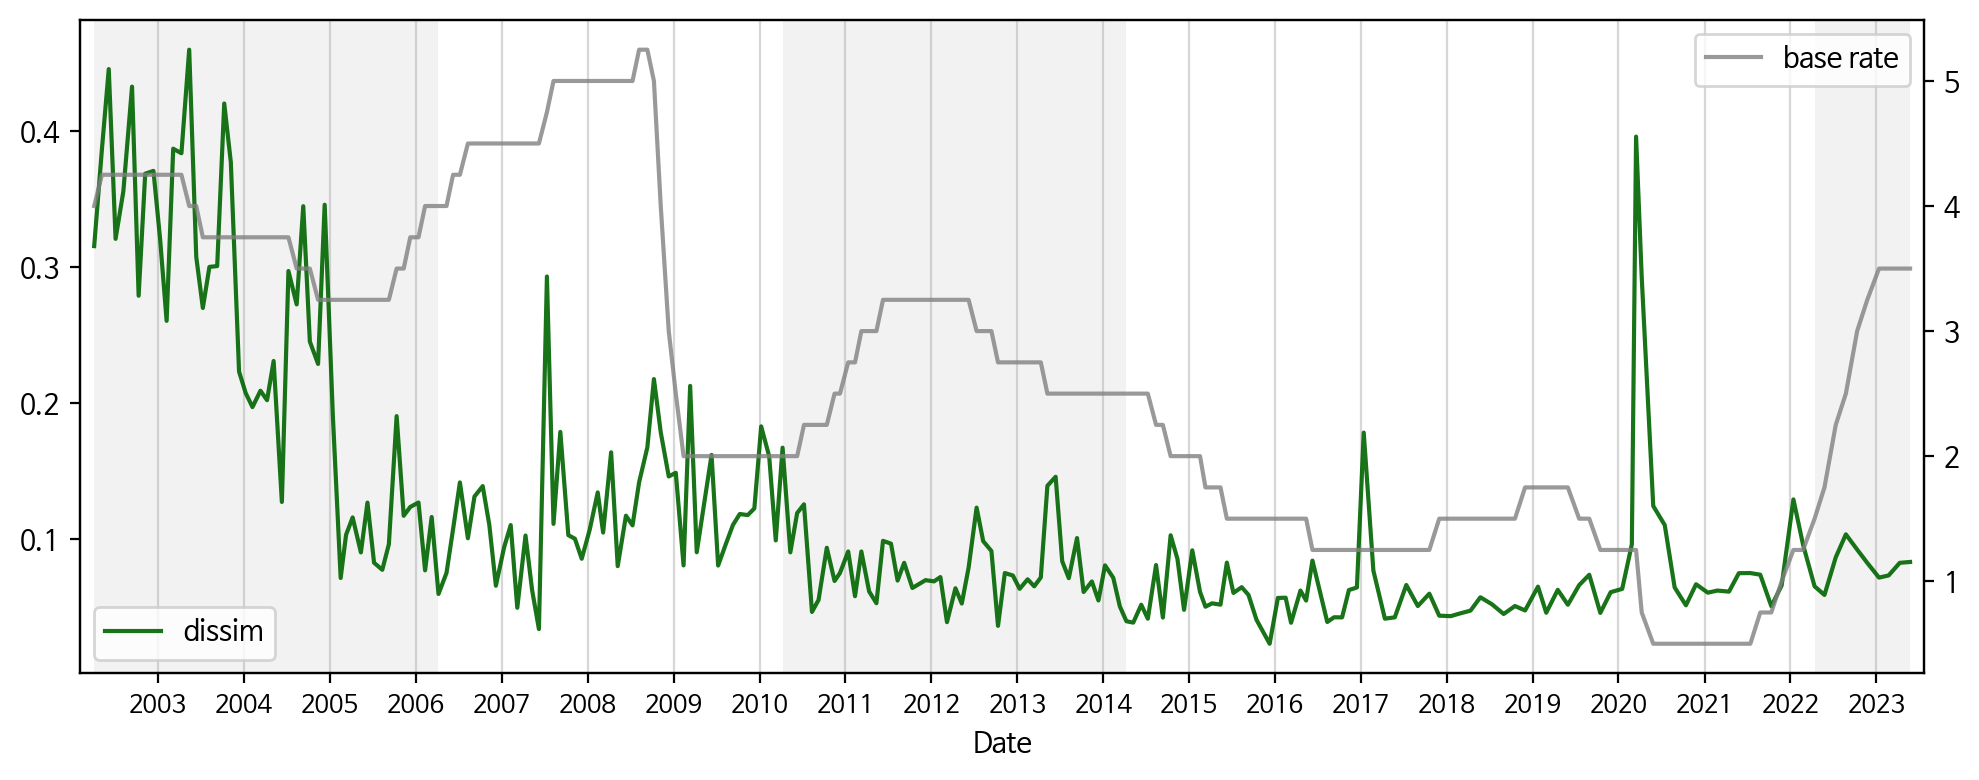

In [11]:
# 방법: 한 그래프에 그리기
# dissim

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["dissimilarity"], color="darkgreen", alpha=0.9, label="dissim")
# ax2.plot(df.index, df["base_rate"], color="orange", alpha=0.9, label="base rate")
ax2.plot(df.index, df["base_rate"], color="gray", alpha=0.8, label="base rate")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("./plot/plot_비유사도-기준금리.png", dpi=200)
plt.show()

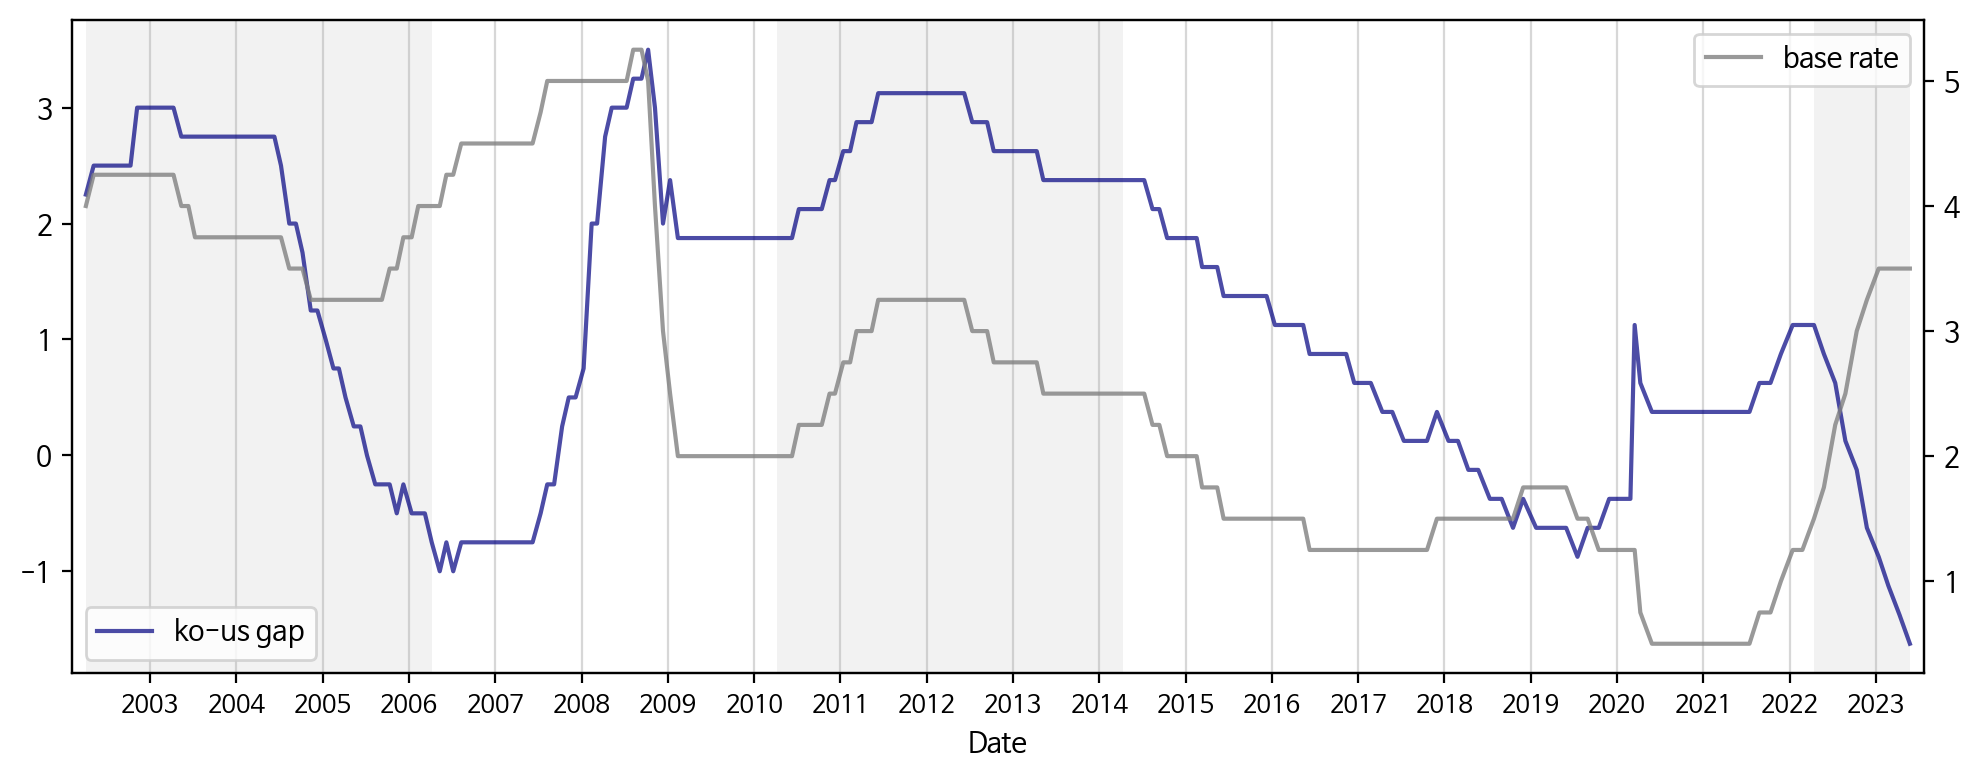

In [12]:
# ko-us_gap

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["ko-us_gap"], color="navy", alpha=0.7, label="ko-us gap")
ax2.plot(df.index, df["base_rate"], color="gray", alpha=0.8, label="base rate")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("./plot/plot_금리차-기준금리.png", dpi=200)
plt.show()

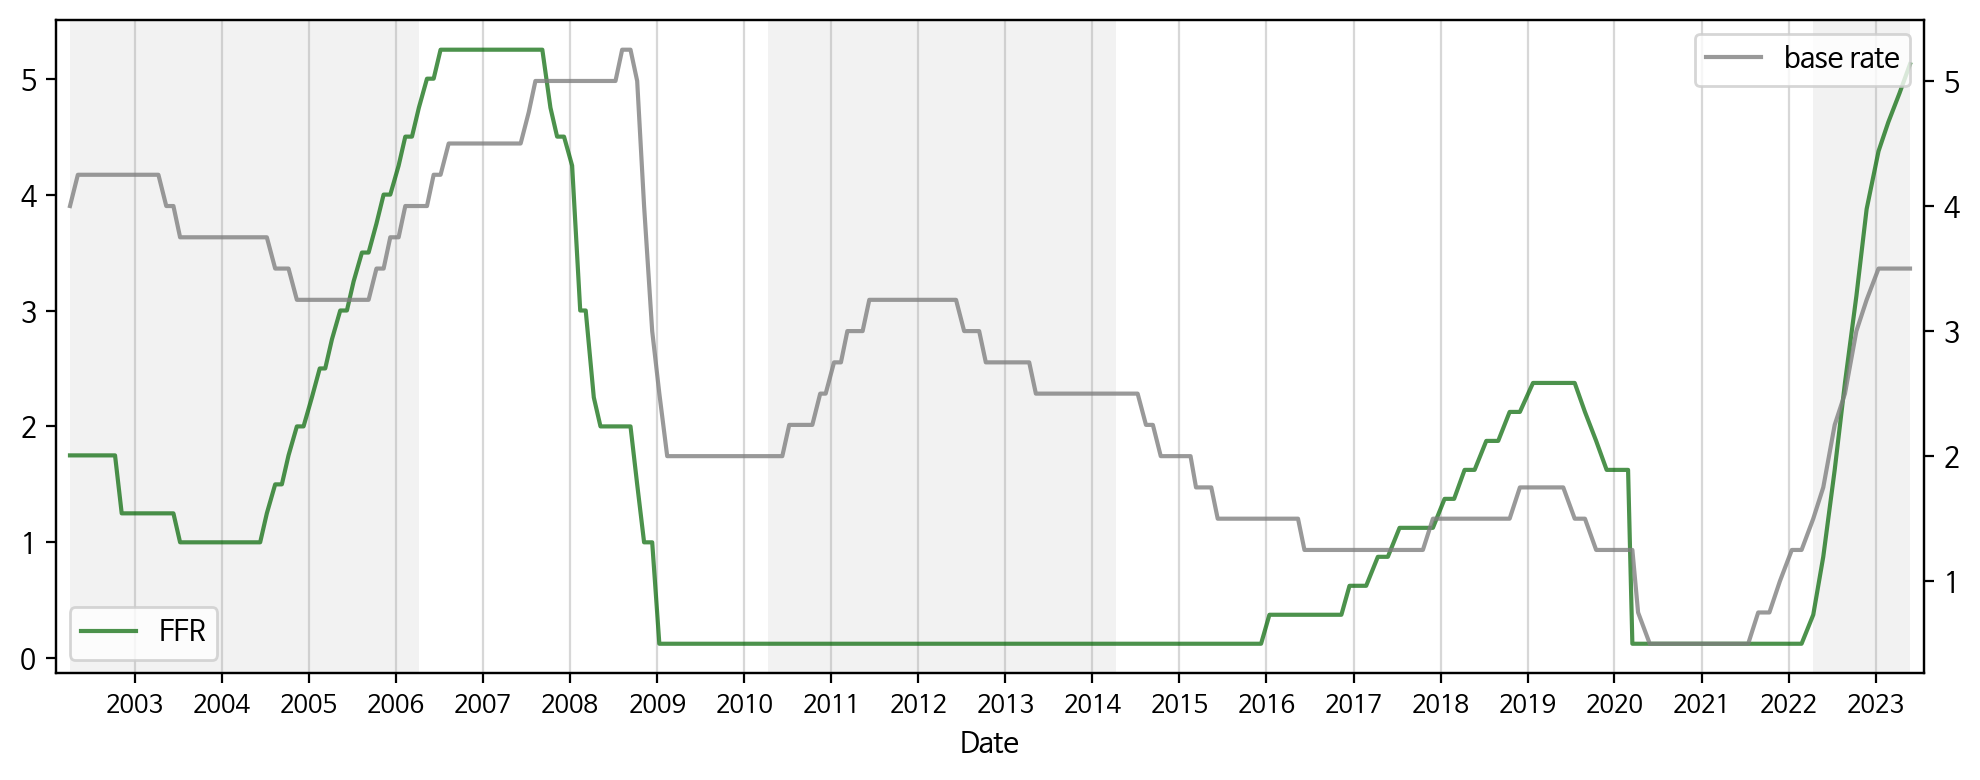

In [13]:
# FFR
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["FFR"], color="darkgreen", alpha=0.7, label="FFR")
# ax2.plot(df.index, df["base_rate"], color="orange", alpha=0.9, label="base rate")
ax2.plot(df.index, df["base_rate"], color="gray", alpha=0.8, label="base rate")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("./plot/plot_FFR-기준금리.png", dpi=200)
plt.show()

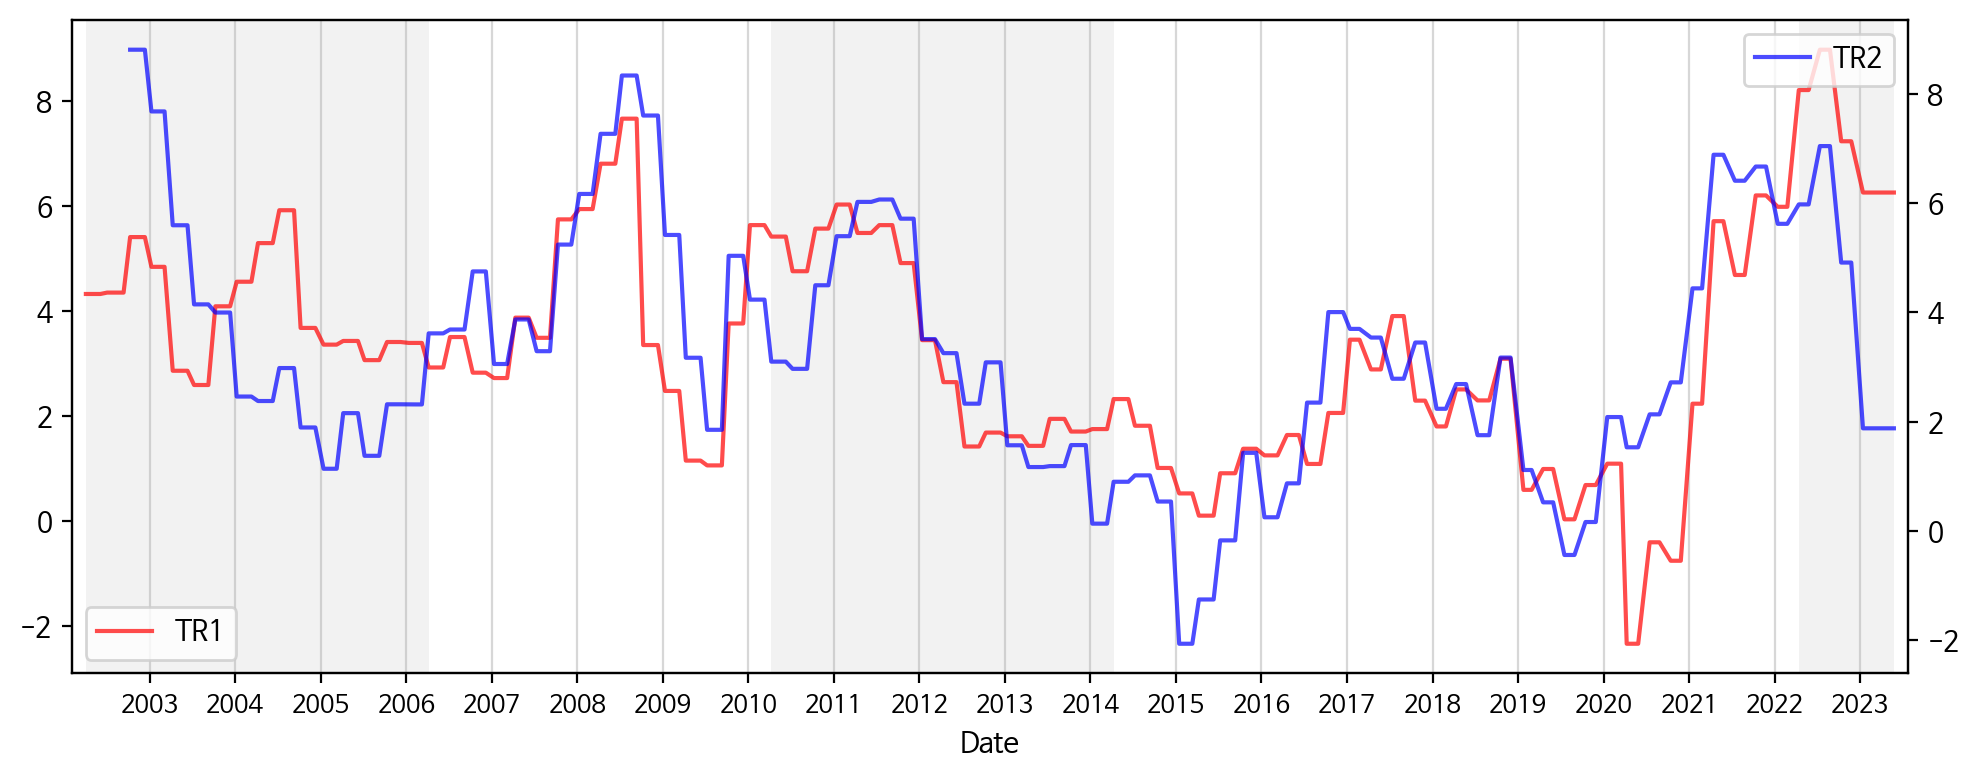

In [14]:
# TR1-TR2
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["tr1"], color="red", alpha=0.7, label="TR1")
ax2.plot(df.index, df["tr2"], color="blue", alpha=0.7, label="TR2")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("./plot/plot_TR1-TR2.png", dpi=200)
plt.show()

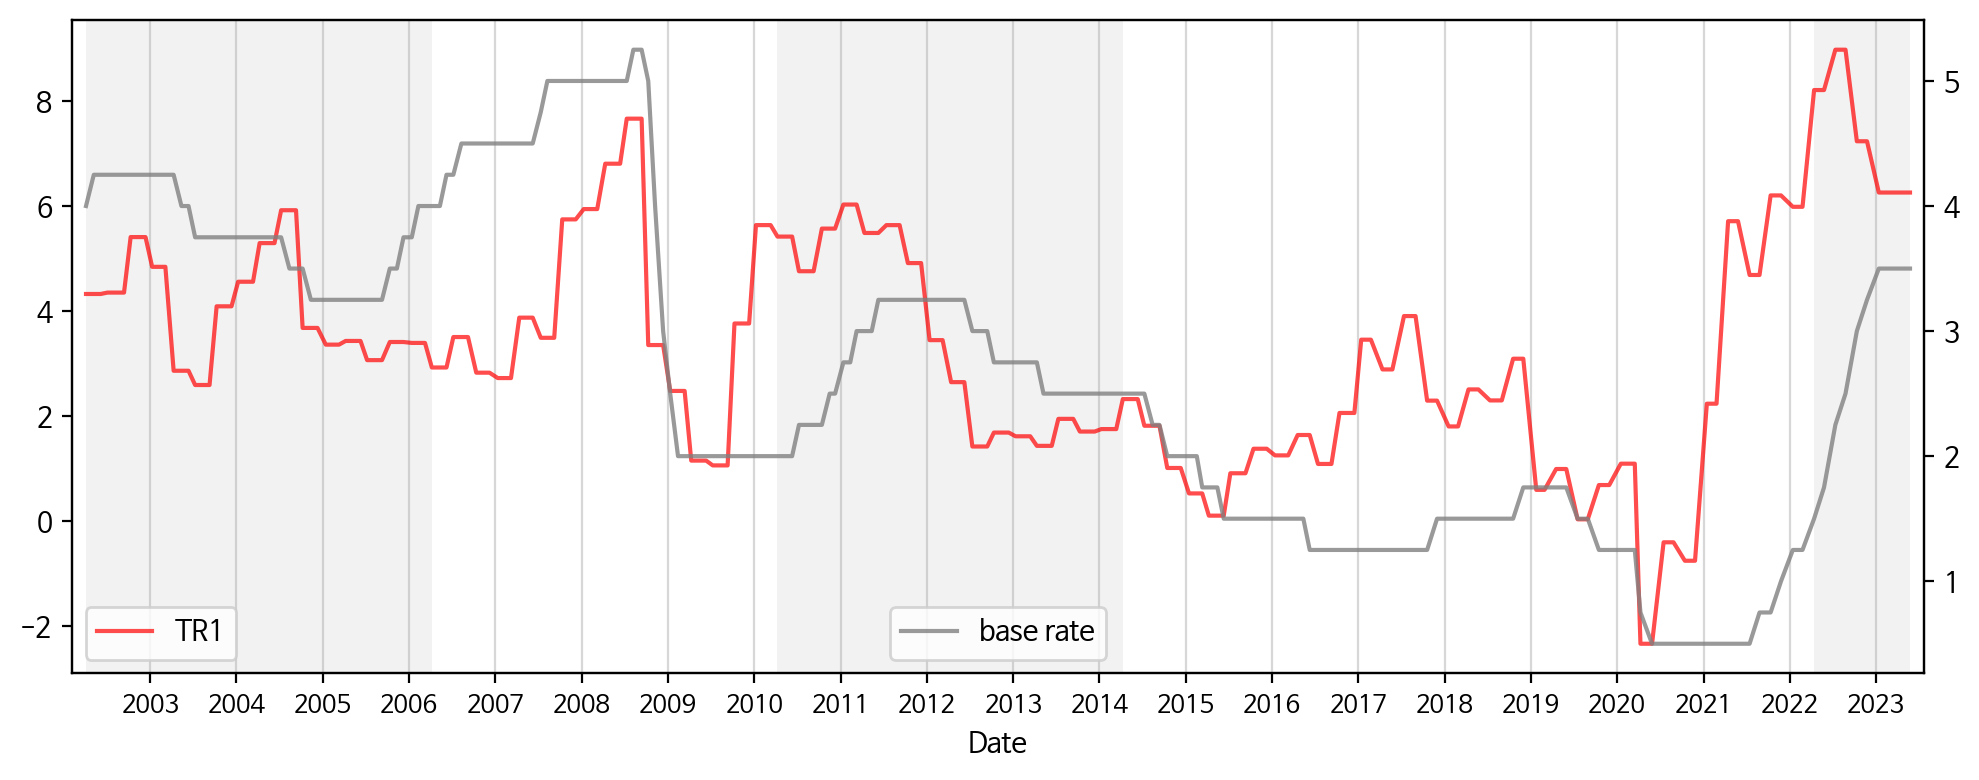

In [15]:
# TR1, base_rate
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["tr1"], color="red", alpha=0.7, label="TR1")
# ax2.plot(df.index, df["tr2"], color="blue", alpha=0.7, label="TR2")
# ax2.plot(df.index, df["base_rate"], color="orange", alpha=0.9, label="base rate")
ax2.plot(df.index, df["base_rate"], color="gray", alpha=0.8, label="base rate")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="lower center")

# # 각 축에 legend 추가
# ax1.legend(loc="lower left")
# ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

# plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("./plot/plot_TR1-기준금리.png", dpi=200)
plt.show()

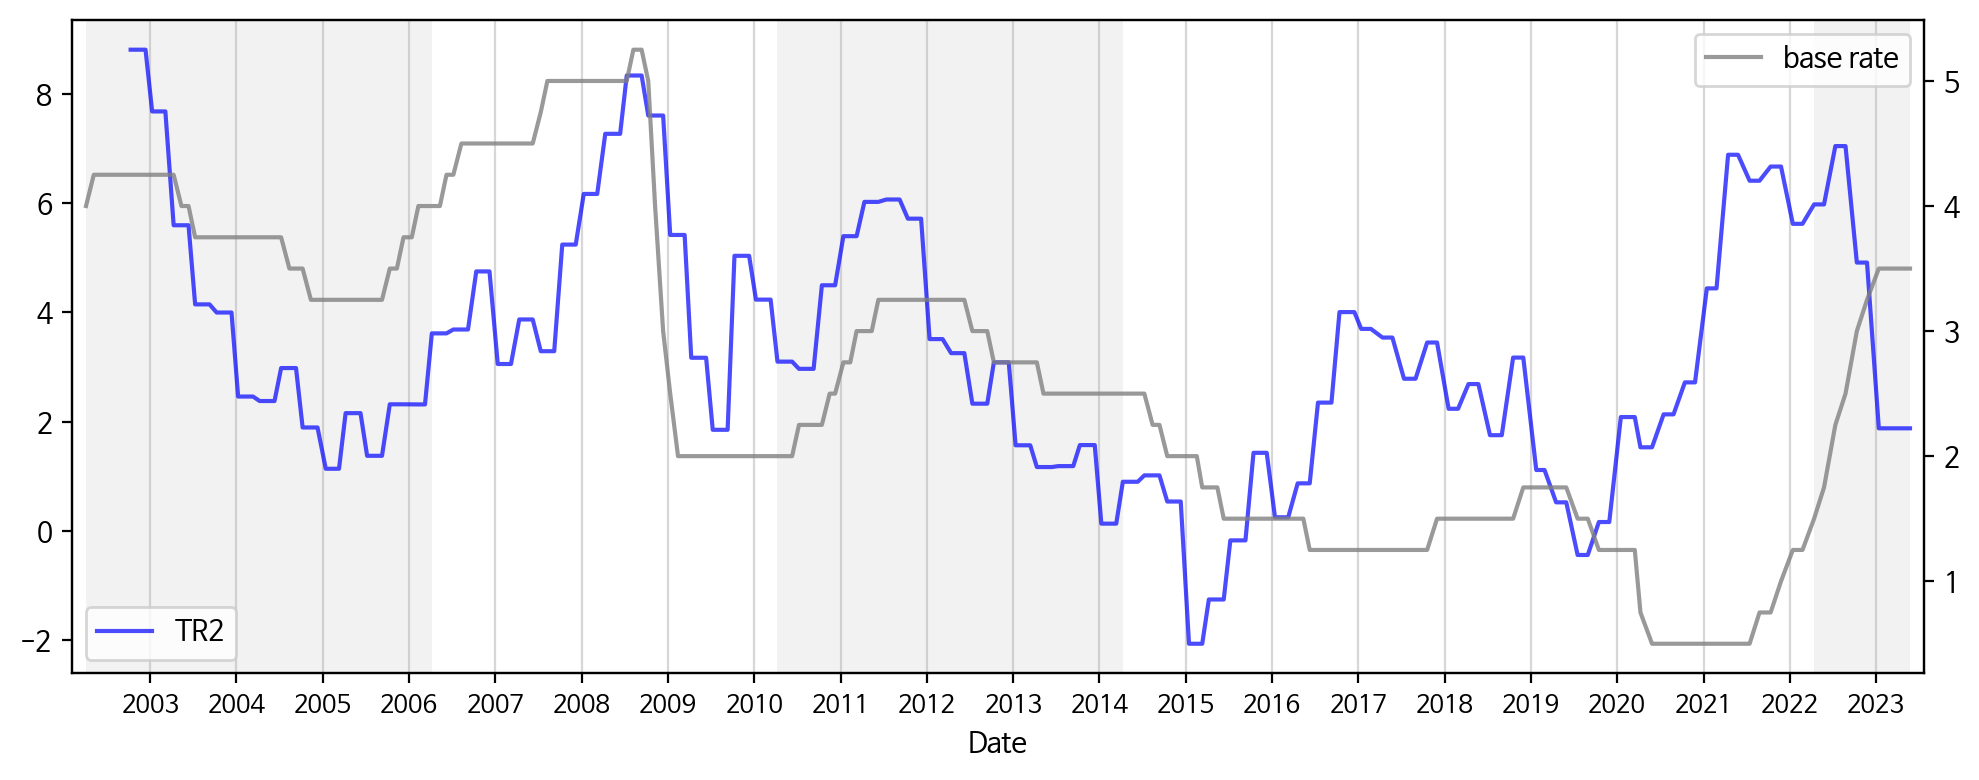

In [16]:
# TR2, base_rate
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

ax1.plot(df.index, df["tr2"], color="blue", alpha=0.7, label="TR2")
ax2.plot(df.index, df["base_rate"], color="gray", alpha=0.8, label="base rate")

ax1.set_xlabel("Date")

# 각 축에 legend 추가
ax1.legend(loc="lower left")
ax2.legend(loc="upper right")

# 음영 추가
for i in range(len(df) - 1):  # 마지막은 제외
    date = df.index[i]
    if df.loc[date, "governor"] in gray_governor:
        ax1.axvspan(df.index[i], df.index[i + 1], facecolor='gray', alpha=0.1)

# x축 구간 잡기 (너무 딱 붙진 않게)
margin_date = pd.Timedelta(days=60) 
plt.xlim(df.index[0] - margin_date, df.index[-1] + margin_date)

# xticks
ax1.xaxis.set_major_locator(dates.YearLocator(base=1))
ax1.xaxis.set_tick_params(labelsize=9)

# ax1 기준으로 grid
ax1.grid(alpha=0.5, axis="x")
# plt.grid(alpha=0.5)

plt.tight_layout()
plt.savefig("./plot/plot_TR2-기준금리.png", dpi=200)
plt.show()

### 그래프: fimp

In [17]:
targets = os.listdir("./model_result")
targets

['All', 'result_table.xlsx', '김중수', '박승', '이성태', '이주열', '이창용']

In [18]:
## test ##
target = targets[0]

tr = "TR1"  # TR1 / TR2
model = "dt"  # dt / rforest

file = f"{target}_{tr}_feature_importance_{model}.csv"
fimp = pd.read_csv(f"./model_result/{target}/{file}")
fimp["Target"] = target
fimp

,feature,feature importance,Target
0,tr1,0.604733,All
1,dissim_t5,0.211533,All
2,ko-us_gap_t1,0.183734,All
3,dissim_t1,0.000000,All
4,dissim_t2,0.000000,All
5,dissim_t3,0.000000,All
6,dissim_t4,0.000000,All
7,dissim_t6,0.000000,All


In [19]:
## merge ##

dfs = []

# 일단은 dt만 가지고 먼저
model = "dt"  # dt / rforest

# tr = "TR1"  # TR1 / TR2
for tr in ["TR1", "TR2"]:
    for target in targets:
        file = f"{target}_{tr}_feature_importance_{model}.csv"
        if os.path.isfile(f"./model_result/{target}/{file}"):
            imp = pd.read_csv(f"./model_result/{target}/{file}")
            imp["Target"] = target
            imp["TR"] = tr
            dfs.append(imp)

fimp_all = pd.concat(dfs)

In [20]:
fimp_all

,feature,feature importance,Target,TR
0,tr1,0.604733,All,TR1
1,dissim_t5,0.211533,All,TR1
2,ko-us_gap_t1,0.183734,All,TR1
3,dissim_t1,0.000000,All,TR1
4,dissim_t2,0.000000,All,TR1
...,...,...,...,...
3,dissim_t3,0.000000,이창용,TR2
4,dissim_t4,0.000000,이창용,TR2
5,dissim_t5,0.000000,이창용,TR2
6,dissim_t6,0.000000,이창용,TR2


In [21]:
# fimp.values.tolist()

In [22]:
# # Matplotlib 및 Seaborn 기본 설정
# sns.set(style="whitegrid")
# plt.figure(figsize=(14, 8))

# fimp.columns = ["feature", "imp", "target"]

# # 산점도 그리기
# g = sns.scatterplot(data=fimp, x="target", y="imp", hue="feature", palette="deep", s=200)

# # 축 레이블 설정
# g.set_xlabel("Target", fontsize=13)
# g.set_ylabel("Importance", fontsize=13)

# # 범례 위치 조정
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)

# plt.show()

In [23]:
target_mapping = {
    "김중수": "Kim JS",
    "박승": "Park S.",
    "이성태": "Lee ST",
    "이주열": "Lee JY",
    "이창용": "Lee CY",
    "전철환": "Jeon CH",
    "All": "All"
}

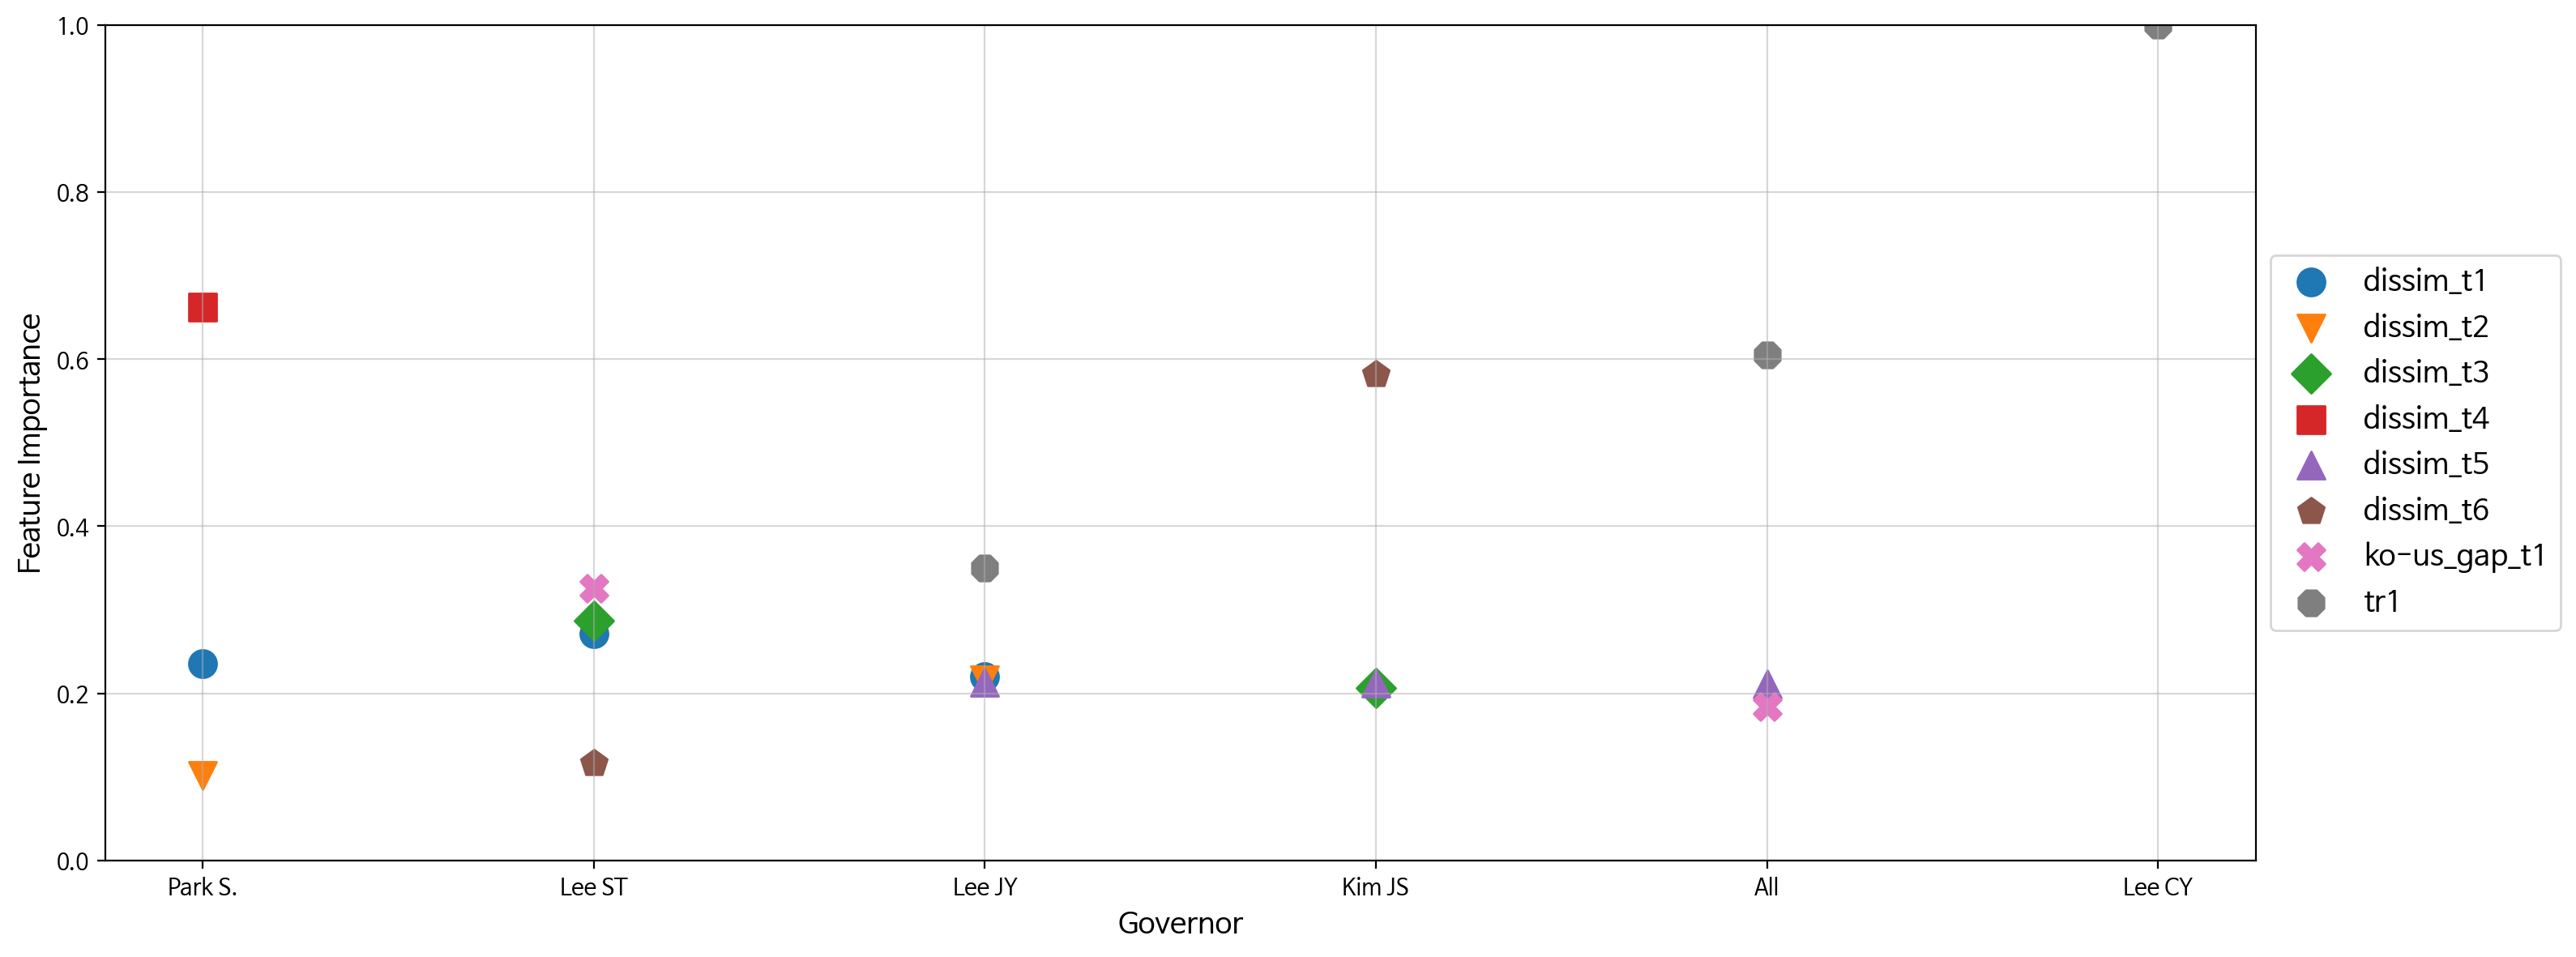

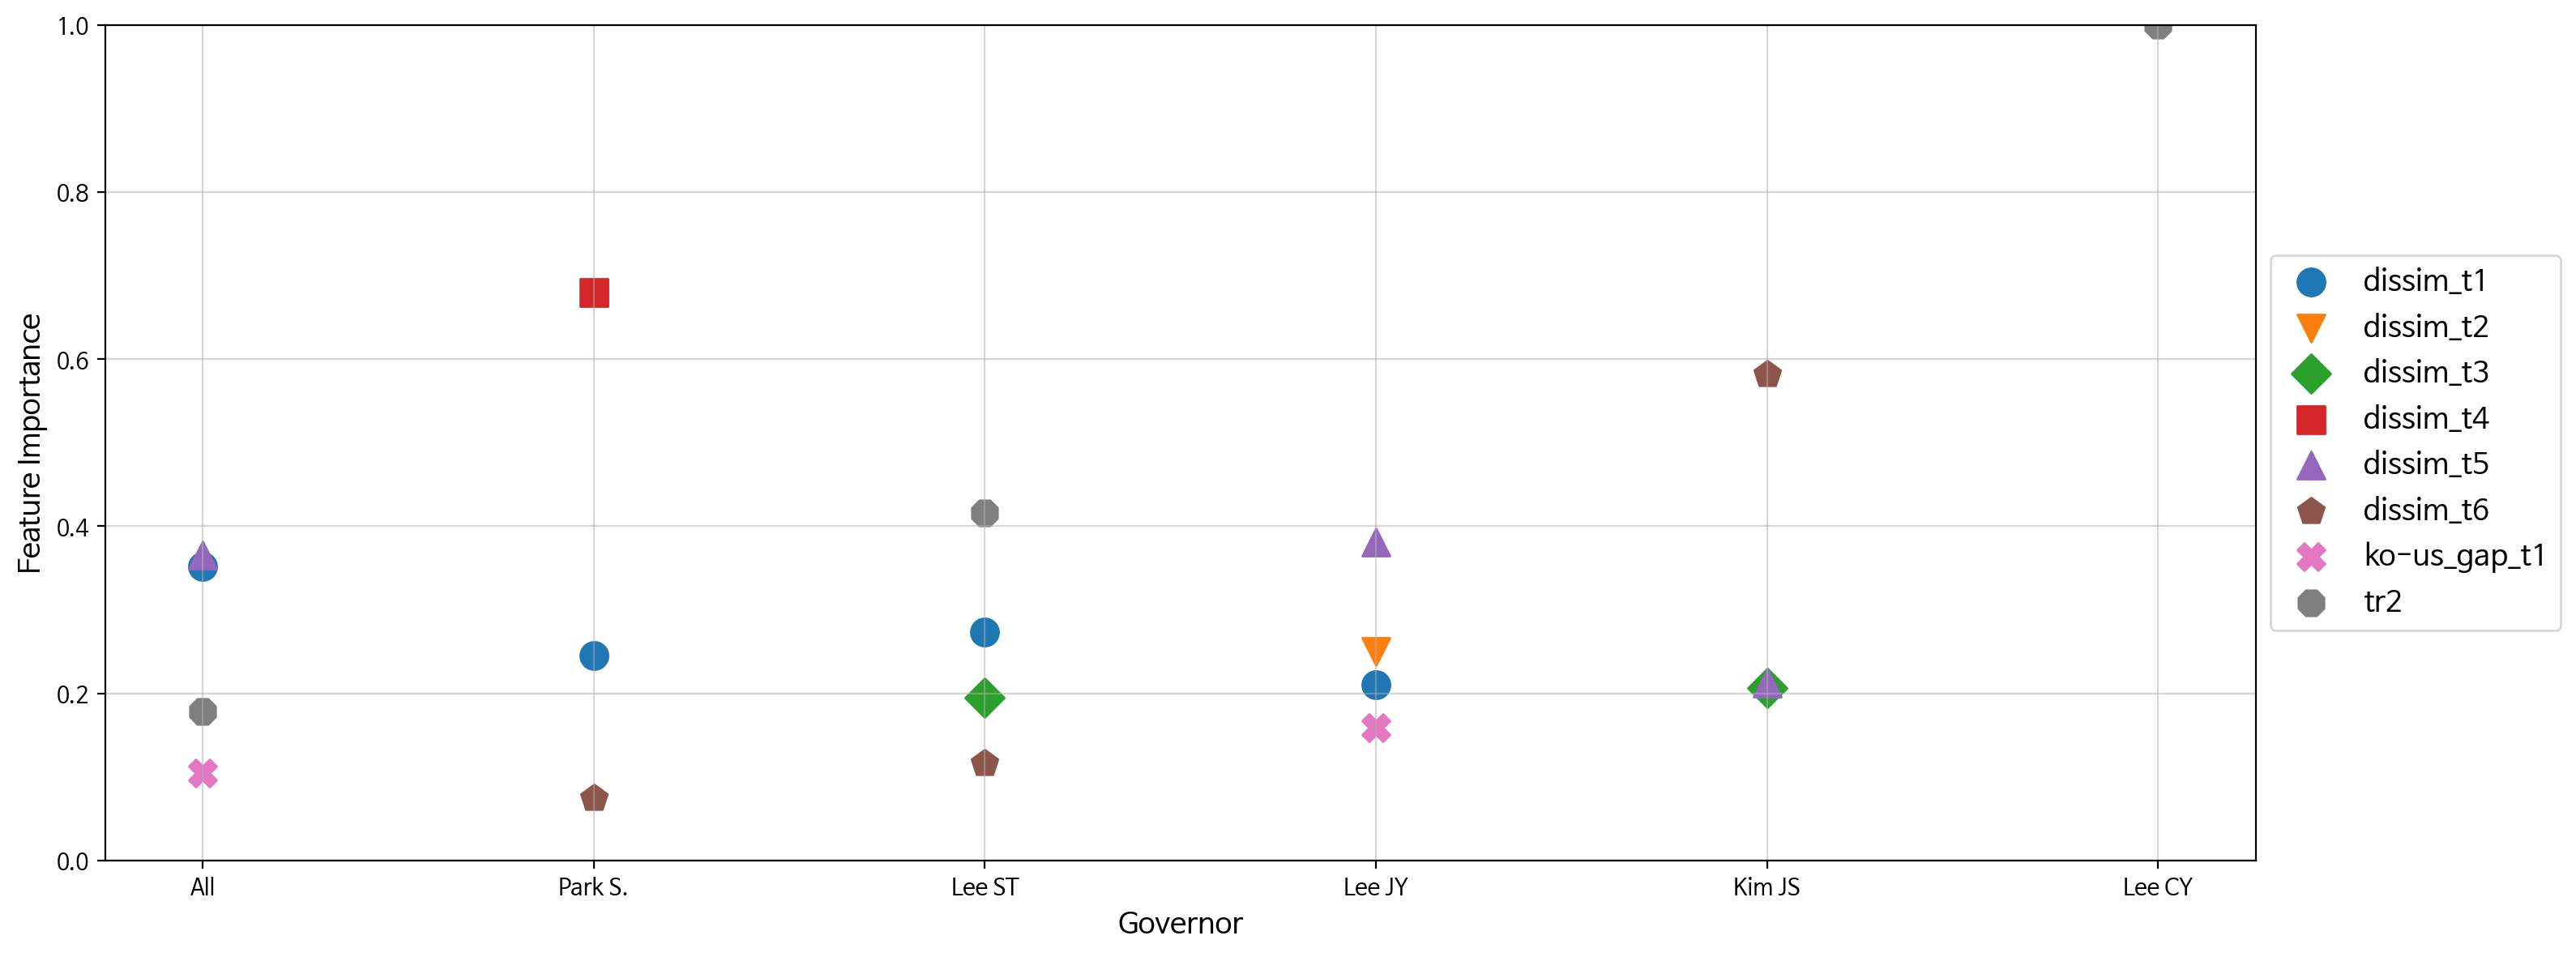

In [24]:
### matplotlib 만 사용

for tr in ["TR1", "TR2"]:
    # 데이터 준비
    fimp = fimp_all.loc[fimp_all["TR"] == tr, :].copy().drop("TR", axis=1)
    fimp.columns = ["feature", "imp", "target"]

    # 마커 모양 목록
    markers = ['o', 'v', 'D', 's', '^', 'p', 'X', '8', 'P', 'o', '*', 'd']

    # 도화지 초기화 및 크기 설정
    fig, ax = plt.subplots(figsize=(16, 6))

    # 데이터프레임에서 unique한 feature를 가져옵니다.
    features = fimp['feature'].sort_values().unique()

    # 각 feature에 대해 다른 마커 모양으로 산점도를 그립니다.
    for i, feature in enumerate(features):
        temp_df = fimp[fimp['feature'] == feature].copy()
        temp_df["target"] = temp_df["target"].apply(lambda x: target_mapping[x])
        temp_df = temp_df.loc[temp_df["imp"] > 0, :]
        ax.scatter(data=temp_df, x="target", y="imp", marker=markers[i], label=feature, s=150)

    # 축 레이블 설정
    ax.set_xlabel("Governor", fontsize=13)
    ax.set_ylabel("Feature Importance", fontsize=13)
    
    # 범례 위치 조정
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13)
    
    plt.ylim(0.0, 1.0)

    plt.grid(alpha=0.5)
    plt.savefig(f"./plot/plot_Scatter-{tr}.png", dpi=200)
    plt.tight_layout()
    plt.show()

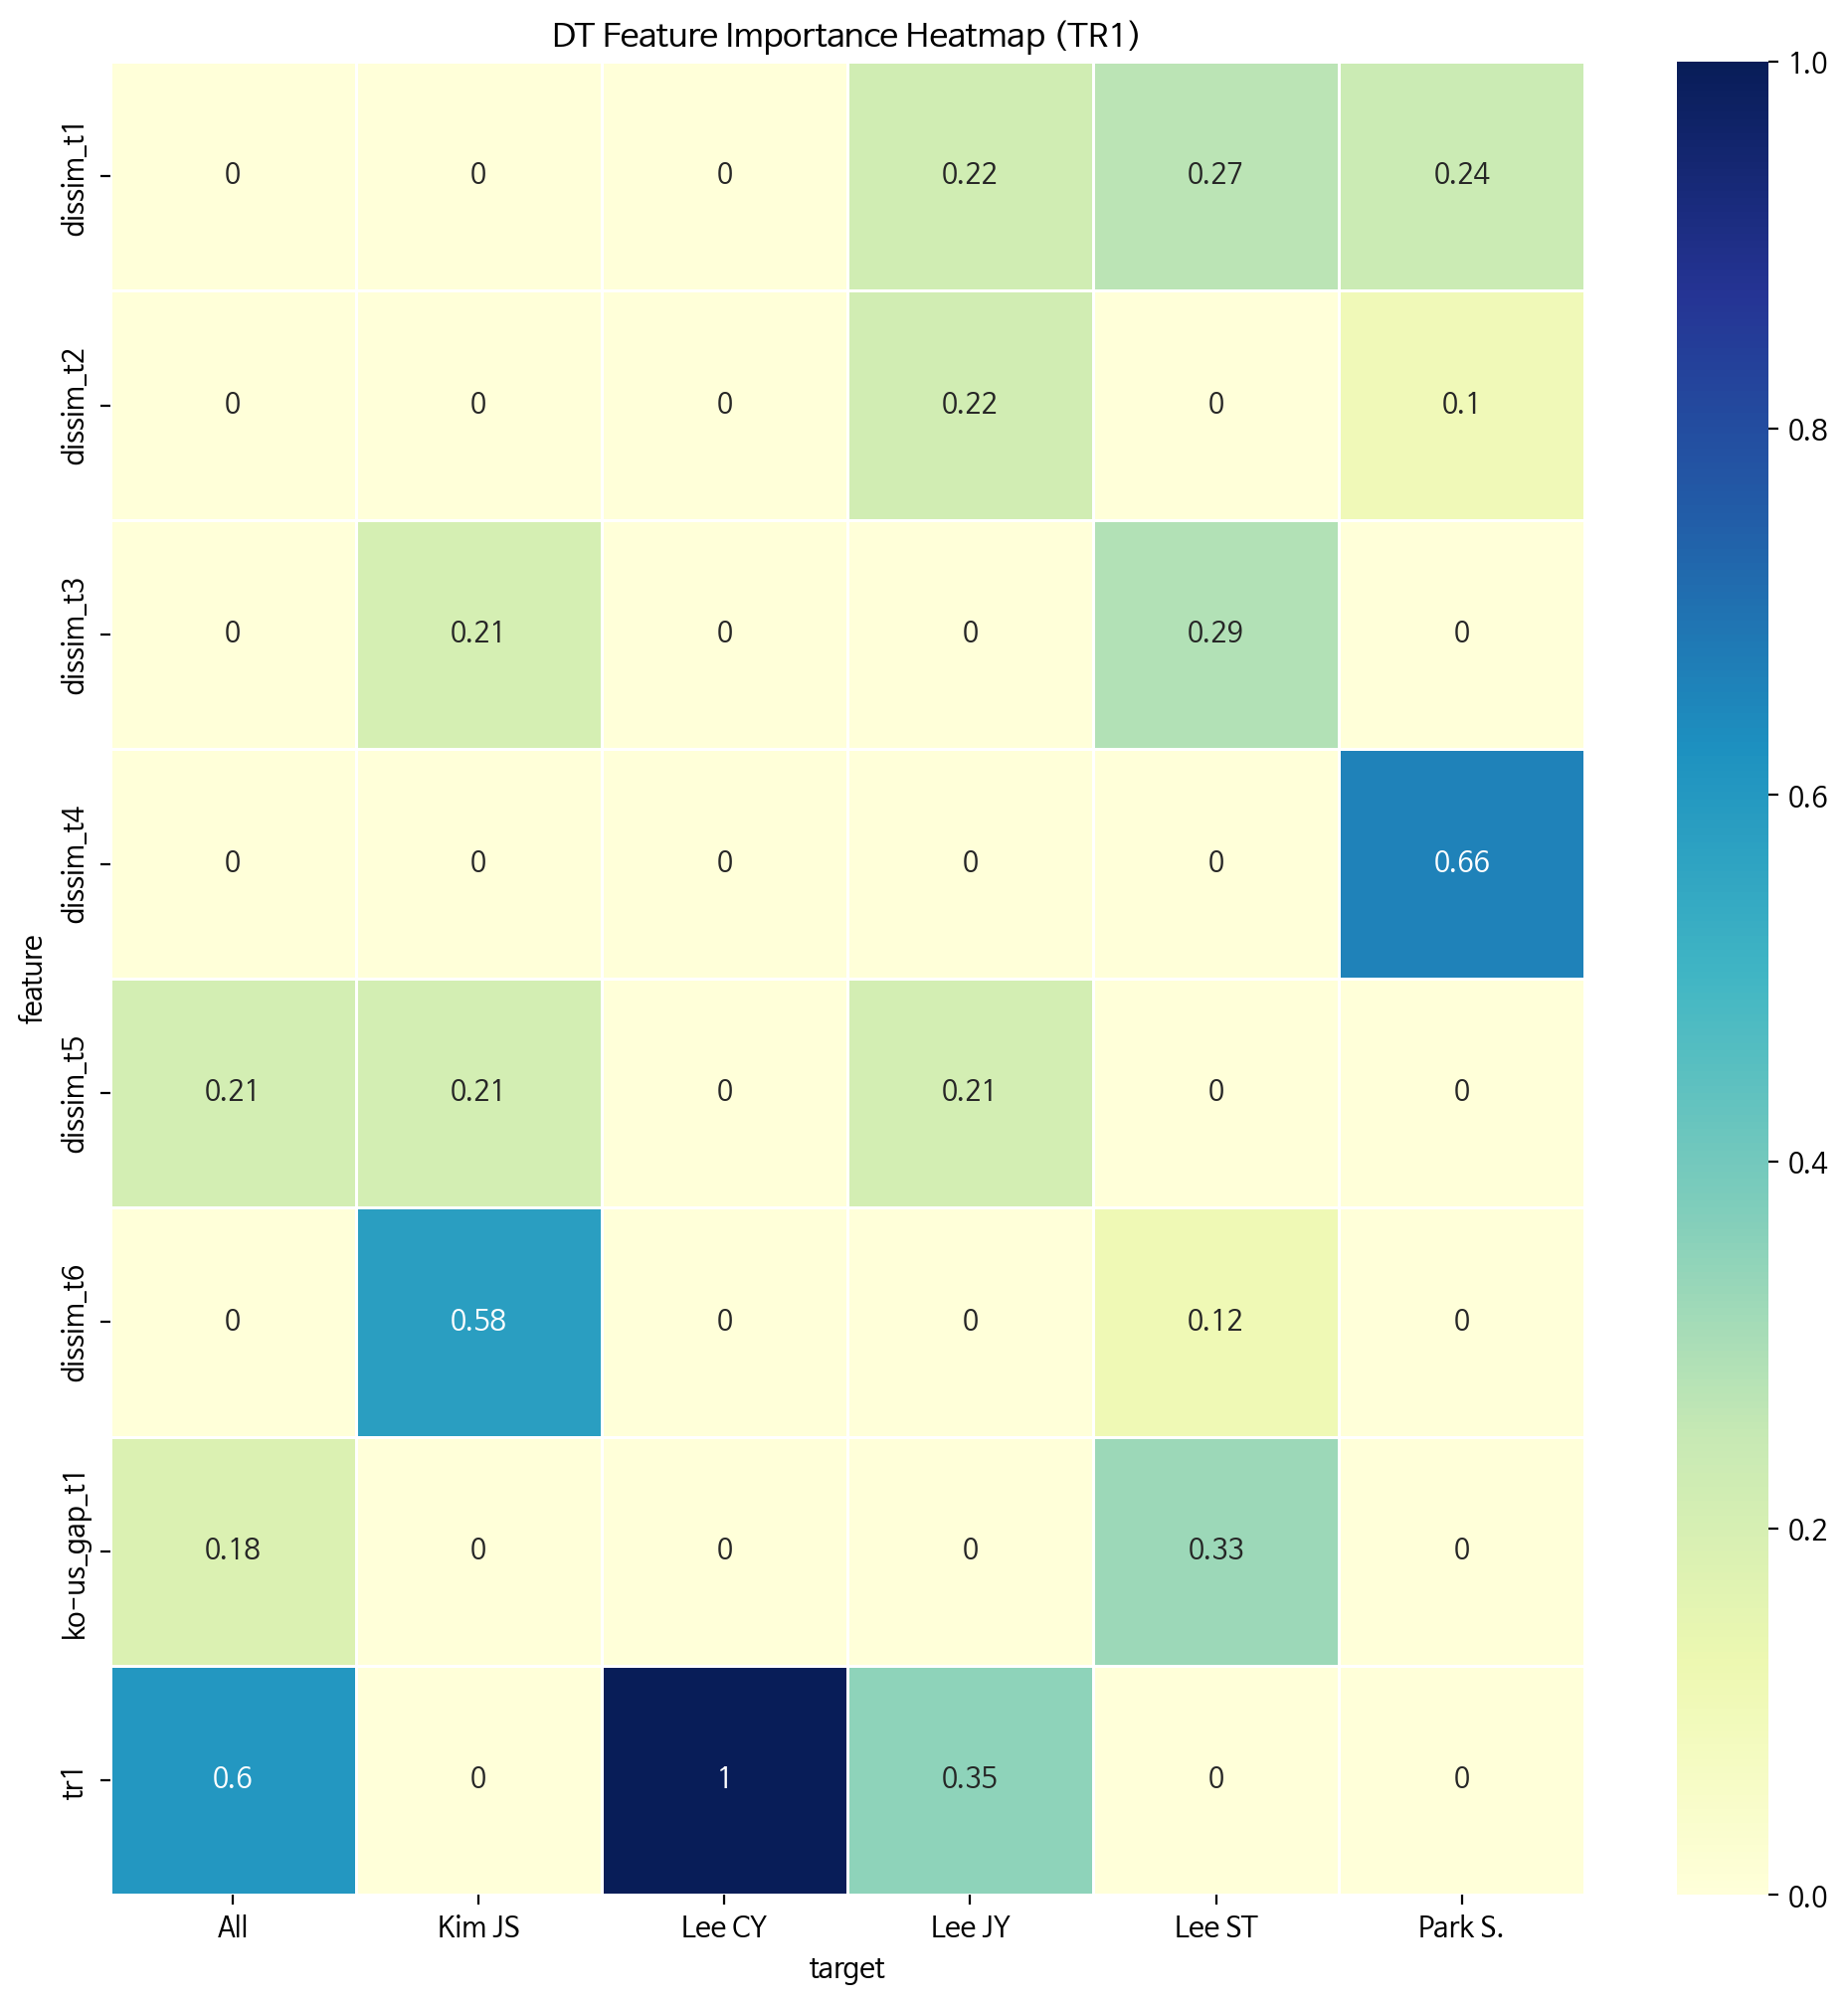

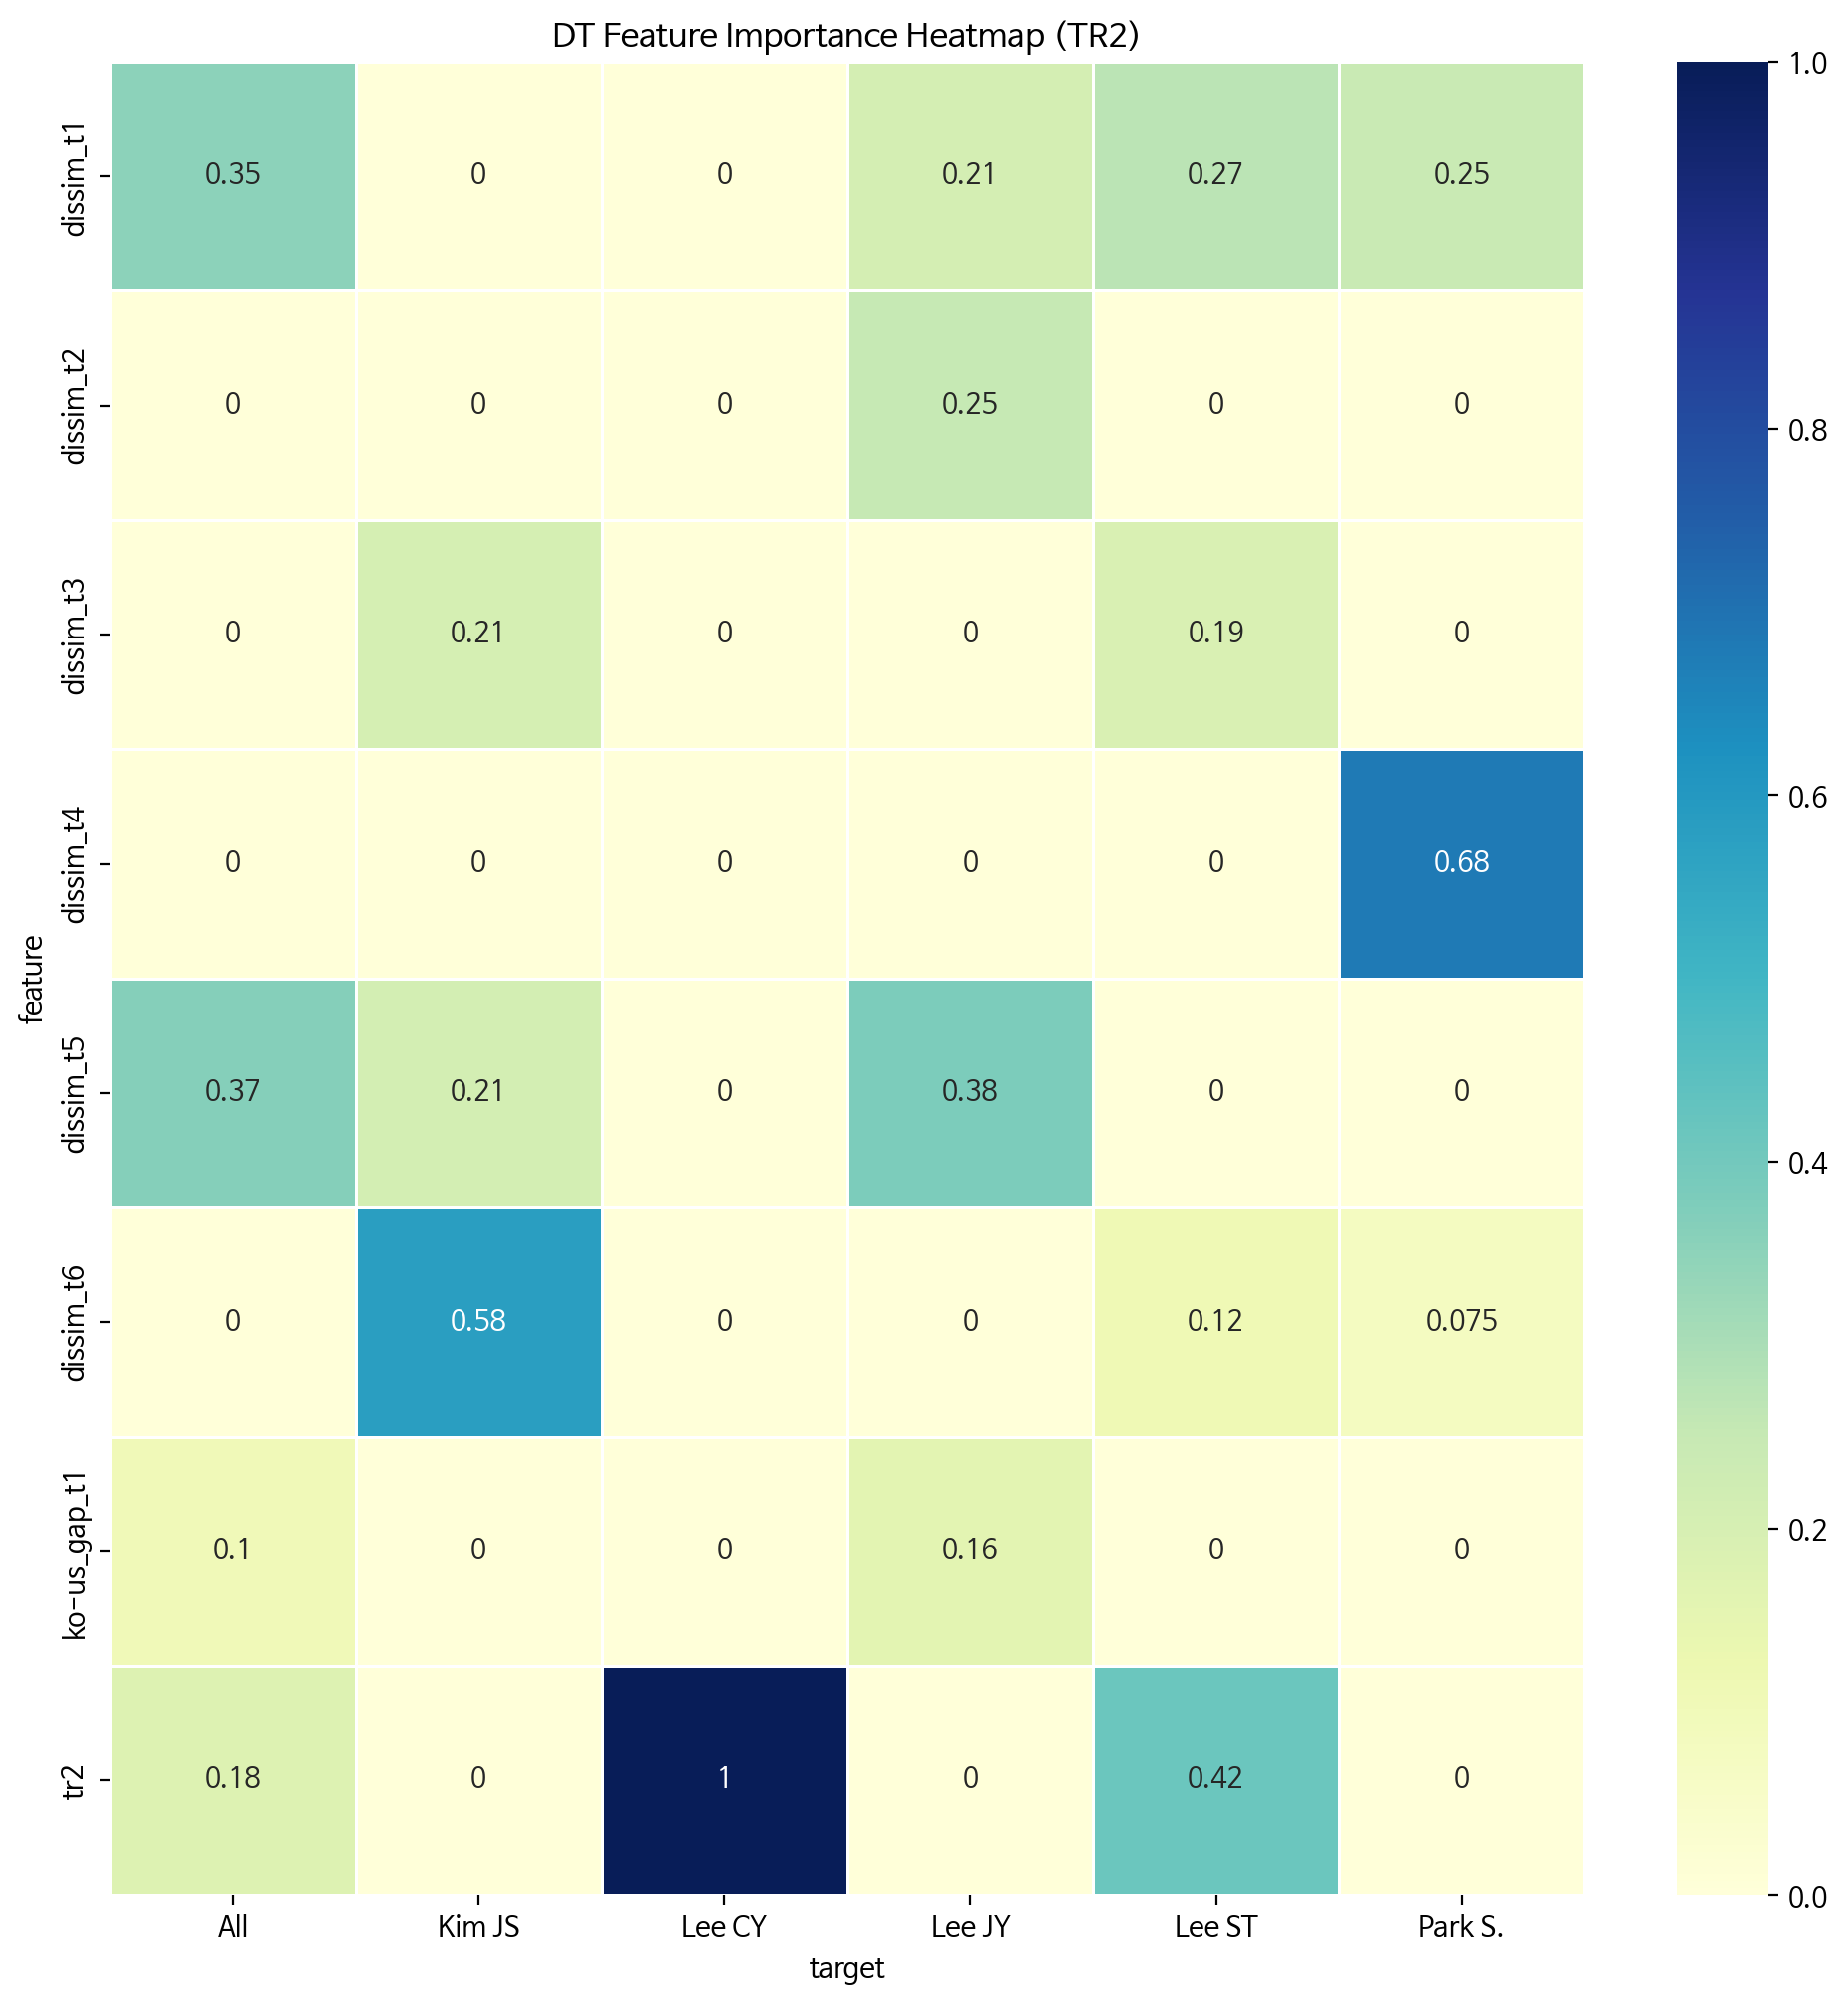

In [25]:
for tr in ["TR1", "TR2"]:
    # 데이터 준비
    fimp = fimp_all.loc[fimp_all["TR"] == tr, :].copy().drop("TR", axis=1)
    fimp.columns = ["feature", "imp", "target"]
    fimp["target"] = fimp["target"].apply(lambda x: target_mapping[x])

    # 피봇 테이블 생성
    pivot_df = fimp.pivot_table(values='imp', index='feature', columns='target')

    # 그래프 설정 및 히트맵 그리기
    plt.figure(figsize=(10, 10))
    sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.tight_layout()

    plt.title(f"DT Feature Importance Heatmap ({tr})")
    plt.savefig(f"./plot/plot_dt_Heatmap-{tr}.png", dpi=200)
    plt.show()

##### 랜덤포레스트 fimp

In [26]:
dfs = []

# 일단은 dt만 가지고 먼저
model = "rforest"  # dt / rforest

# tr = "TR1"  # TR1 / TR2
for tr in ["TR1", "TR2"]:
    for target in targets:
        file = f"{target}_{tr}_feature_importance_{model}.csv"
        if os.path.isfile(f"./model_result/{target}/{file}"):
            imp = pd.read_csv(f"./model_result/{target}/{file}")
            imp["Target"] = target
            imp["TR"] = tr
            dfs.append(imp)

fimp_all = pd.concat(dfs)

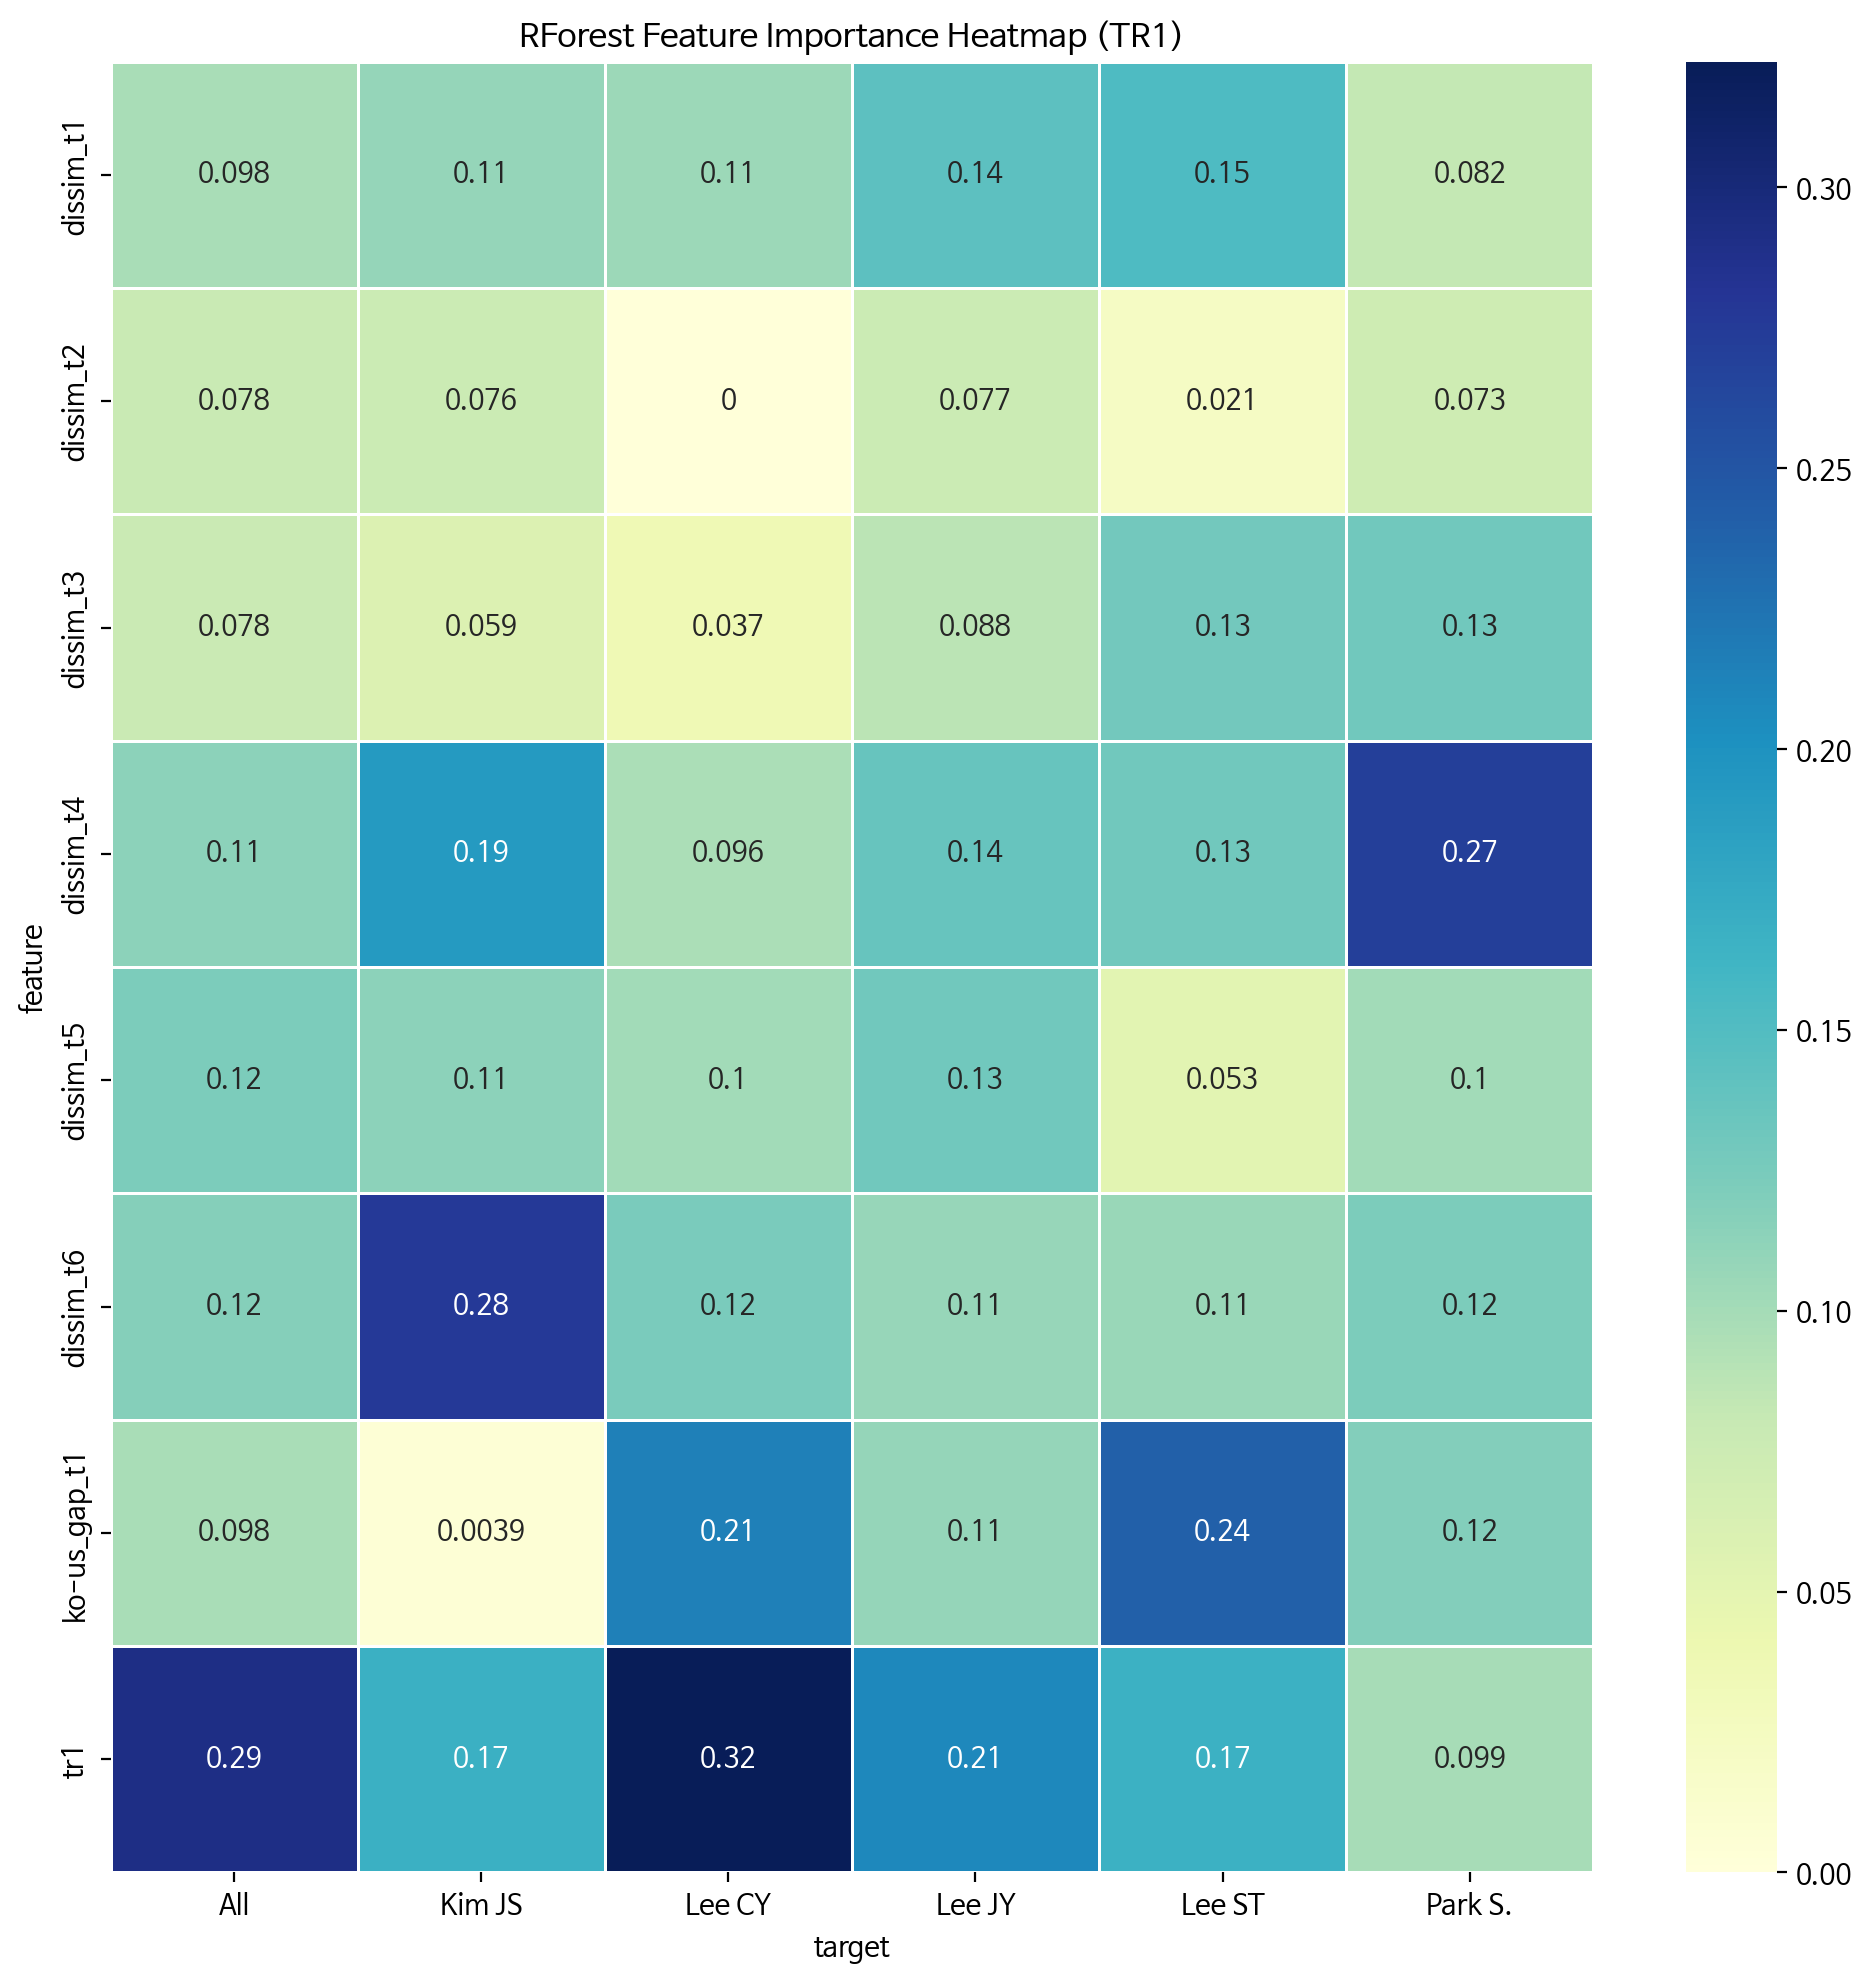

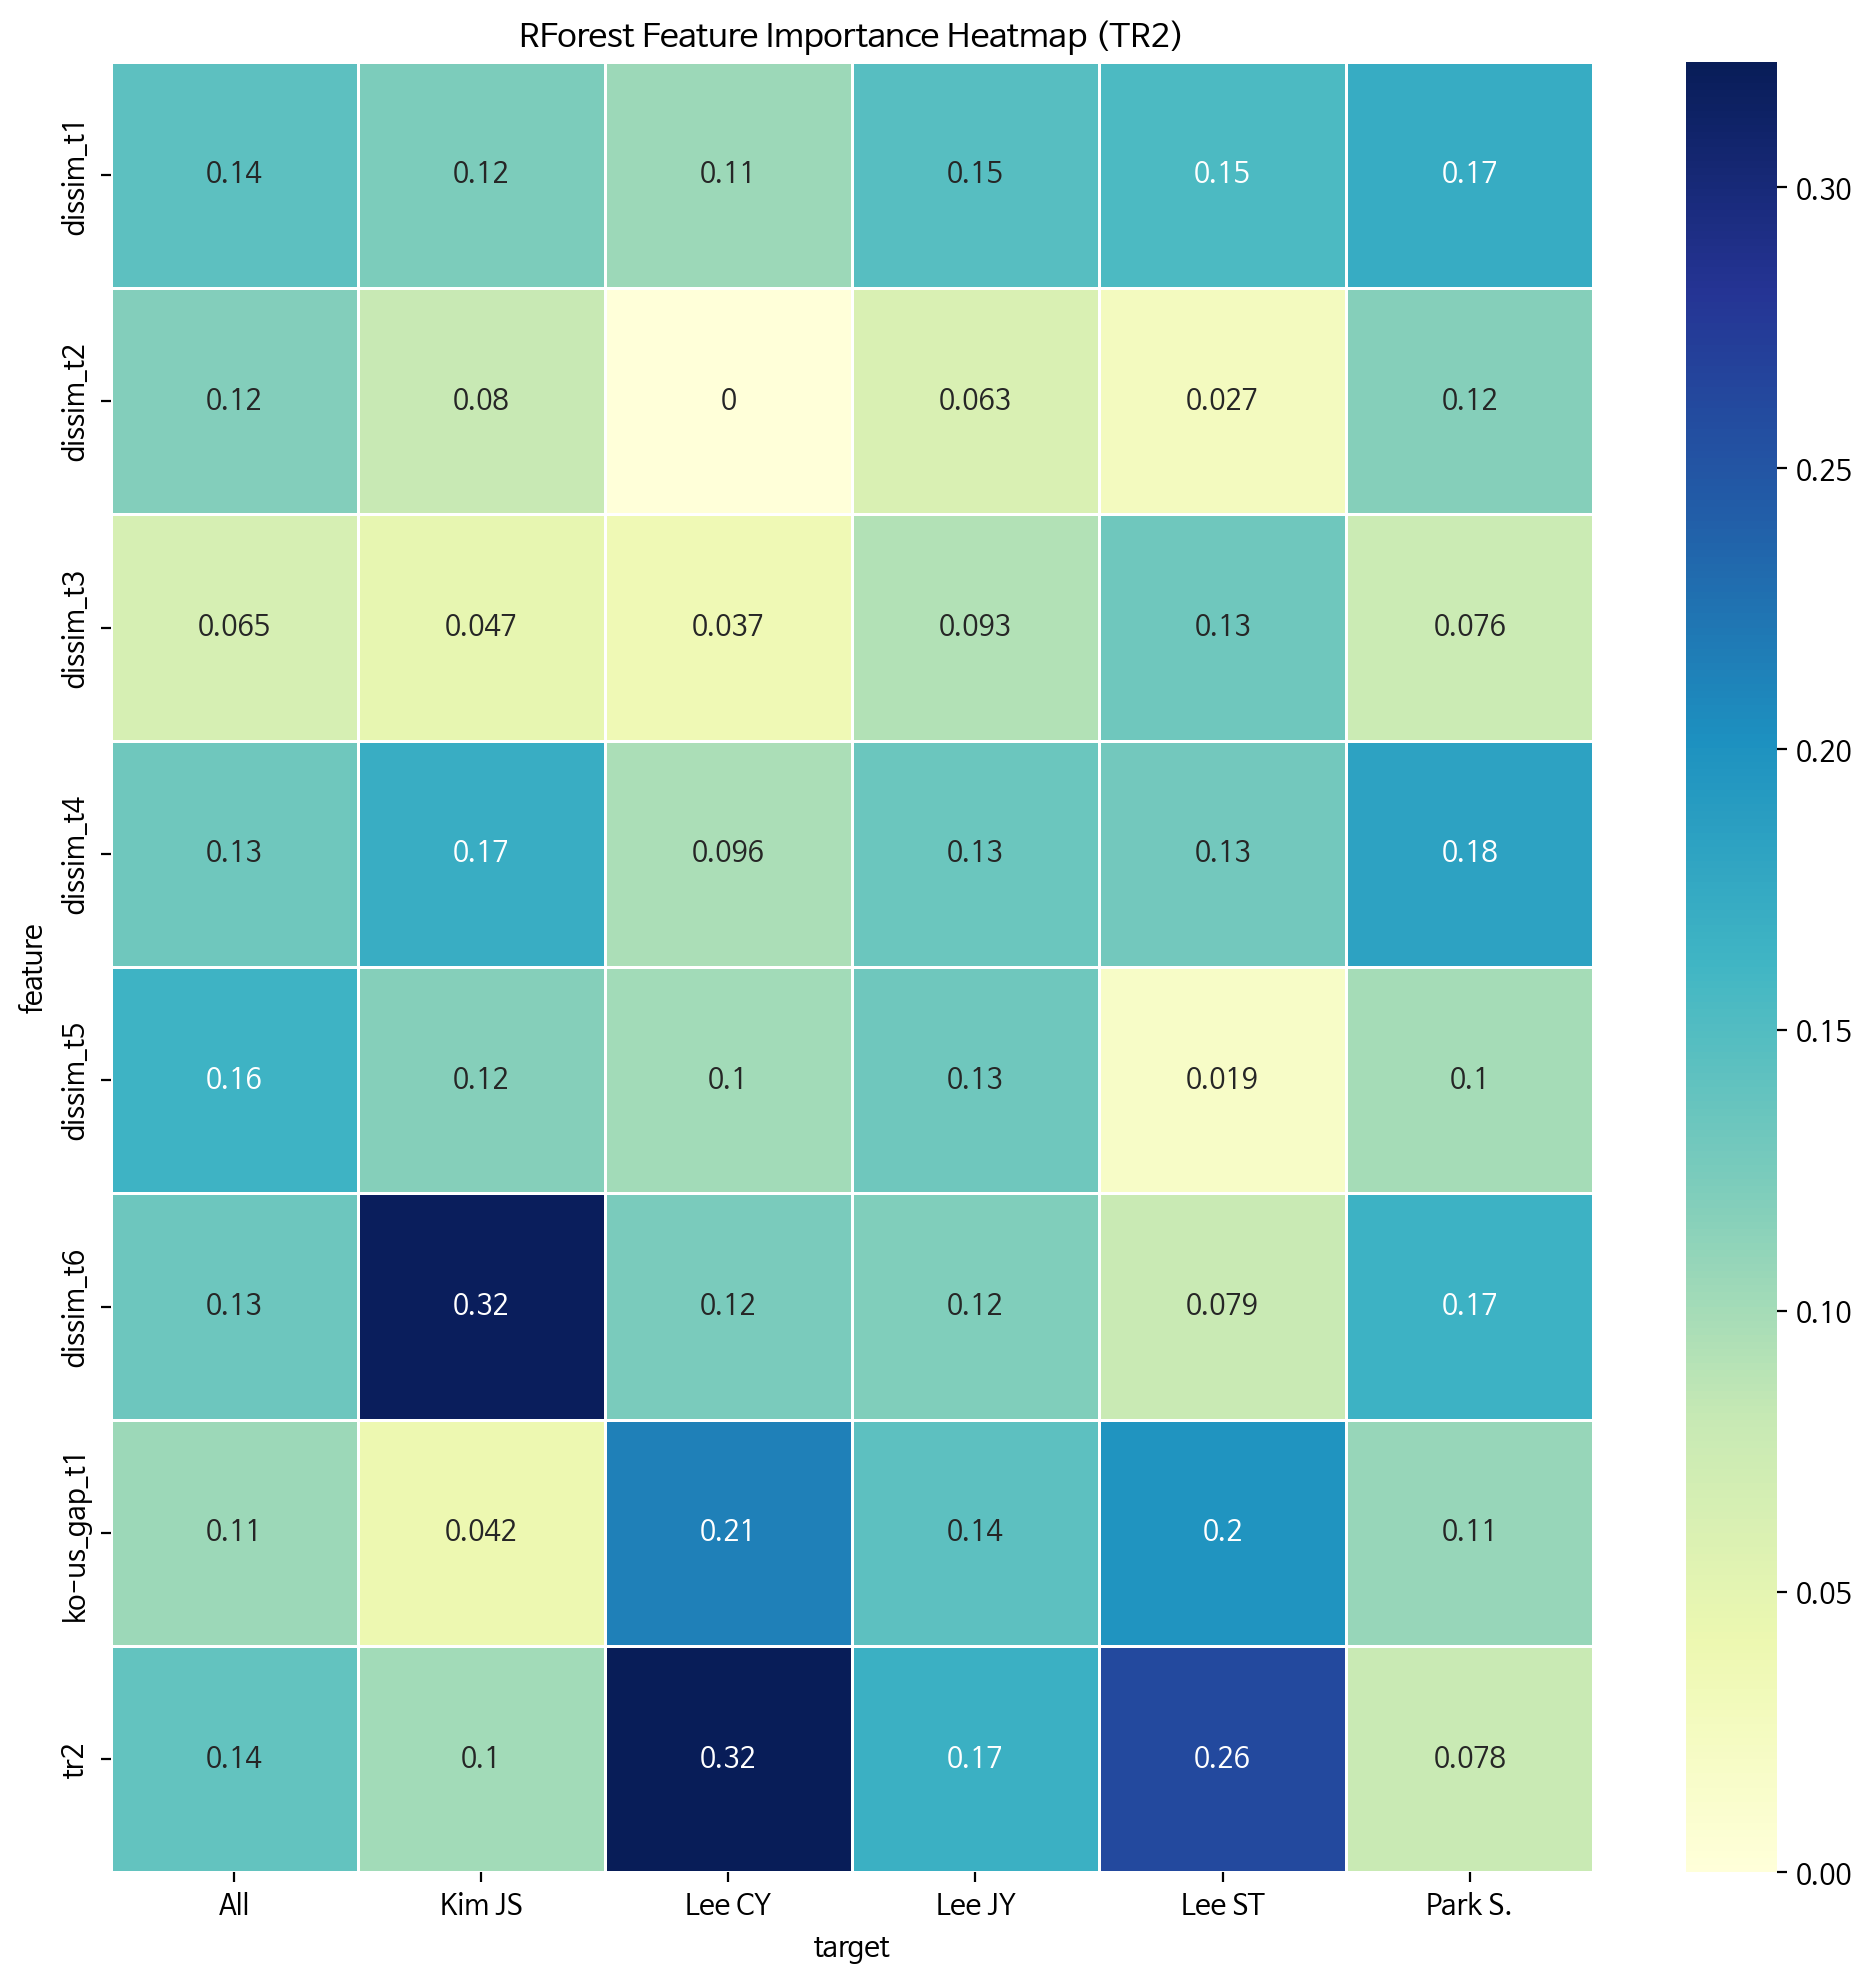

In [27]:
for tr in ["TR1", "TR2"]:
    # 데이터 준비
    fimp = fimp_all.loc[fimp_all["TR"] == tr, :].copy().drop("TR", axis=1)
    fimp.columns = ["feature", "imp", "target"]
    fimp["target"] = fimp["target"].apply(lambda x: target_mapping[x])

    # 피봇 테이블 생성
    pivot_df = fimp.pivot_table(values='imp', index='feature', columns='target')

    # 그래프 설정 및 히트맵 그리기
    plt.figure(figsize=(10, 10))
    sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", linewidths=.5)
    plt.title(f"RForest Feature Importance Heatmap ({tr})")
    plt.tight_layout()

    plt.savefig(f"./plot/plot_rforest_Heatmap-{tr}.png", dpi=200)
    plt.show()

In [28]:
# 압축
!zip ./plot.zip ./plot/* -r

updating: plot/plot_FFR-기준금리.png (deflated 10%)
updating: plot/plot_Scatter-TR1.png (deflated 25%)
updating: plot/plot_Scatter-TR2.png (deflated 24%)
updating: plot/plot_TR1-TR2.png (deflated 6%)
updating: plot/plot_TR1-기준금리.png (deflated 8%)
updating: plot/plot_TR2-기준금리.png (deflated 8%)
updating: plot/plot_dt_Heatmap-TR1.png (deflated 21%)
updating: plot/plot_dt_Heatmap-TR2.png (deflated 20%)
updating: plot/plot_rforest_Heatmap-TR1.png (deflated 15%)
updating: plot/plot_rforest_Heatmap-TR2.png (deflated 14%)
updating: plot/plot_금리차-기준금리.png (deflated 8%)
updating: plot/plot_비유사도-기준금리.png (deflated 6%)
